# ODI Match Data Analysis
Product Pros

Arjun Unnikrishnan 22BTRAD004

Manna Nibu 22BTRAD023

Sohan Saha 22BTRAD029

In [13]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the datasets
odi_match_data = pd.read_csv('ODI_Match_Data.csv', dtype={'season': object})#Season dataype has a mixed time format
odi_match_info = pd.read_csv('ODI_Match_info.csv')

In [15]:
odi_match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [16]:
odi_match_info.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [17]:
#Printing number of rows and columns in data
num_rows,num_cols=odi_match_data.shape
print("No of rows in ODI Match Data:",num_rows)
print("No of columns in ODI Match Data:",num_cols)

No of rows in ODI Match Data: 1265103
No of columns in ODI Match Data: 23


In [18]:
#Printing number of rows and columns in data
num_rows,num_cols=odi_match_info.shape
print("No of rows in ODI Match Info Dataset:",num_rows)
print("No of columns in ODI Match Info Dataset:",num_cols)

No of rows in ODI Match Info Dataset: 2379
No of columns in ODI Match Info Dataset: 18


In [19]:
# Merge datasets based on match_id and id
combined_data = pd.merge(odi_match_data, odi_match_info, left_on='match_id', right_on='id', suffixes=('_match_data', '_match_info'))
# Check for duplicate rows
duplicate_rows = combined_data.duplicated()
num_duplicates = sum(duplicate_rows)
print("Number of duplicate rows:", num_duplicates)
# Remove both duplicate
combined_data = combined_data[~duplicate_rows]

Number of duplicate rows: 15


In [21]:
# Calculate missing values in each column
missing_values = combined_data.isnull().sum()
# Display missing values in each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
match_id                        0
season_match_data               0
start_date                      0
venue_match_data                0
innings                         0
ball                            0
batting_team                    0
bowling_team                    0
striker                         0
non_striker                     0
bowler                          0
runs_off_bat                    0
extras                          0
wides                     1236099
noballs                   1260030
byes                      1263126
legbyes                   1252185
penalty                   1265070
wicket_type               1230614
player_dismissed          1230614
other_wicket_type         1265088
other_player_dismissed    1265088
cricsheet_id                    0
id                              0
season_match_info               0
city                       164797
date                            0
team1                           0
team2            

Basic Statistics Analysis

In [129]:
# Calculate totals for runs, wickets, extras
total_runs = odi_match_data['runs_off_bat'].sum()
total_wickets = odi_match_data['wicket_type'].count()
total_extras = odi_match_data['extras'].sum()
total_matches = odi_match_data['match_id'].nunique()
# Display basic statistics
print("Total Matches:", total_matches)
print("Total Runs:", total_runs)
print("Total Wickets:", total_wickets)
print("Total Extras:", total_extras)

Total Matches: 2379
Total Runs: 998813
Total Wickets: 34474
Total Extras: 61943


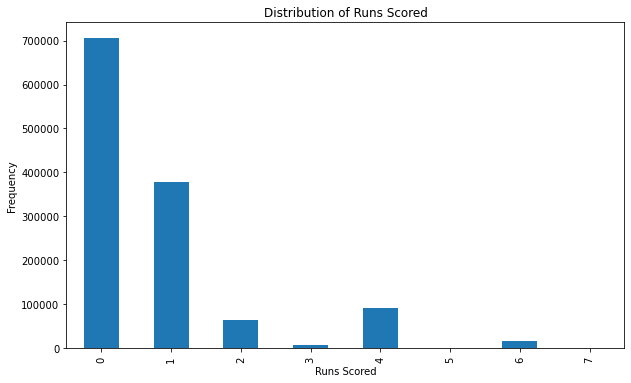

In [132]:
# Analyze the distribution of runs scored
runs_distribution = odi_match_data['runs_off_bat'].value_counts().sort_index()
# Calculate runs scored by each batting team
team_runs_scored = odi_match_data.groupby('batting_team')['runs_off_bat'].sum()
# Calculate total wickets lost by each batting team
team_wickets_lost = odi_match_data.groupby('batting_team')['player_dismissed'].count()
# Calculate batting average for each team
team_batting_avg = team_runs_scored / team_wickets_lost
# Calculate runs conceded by each bowling team
team_runs_conceded = odi_match_data.groupby('bowling_team')['runs_off_bat'].sum()
# Calculate total wickets taken by each bowling team
team_wickets_taken = odi_match_data['wicket_type'].notnull().groupby(odi_match_data['bowling_team']).sum()
# Calculate bowling average for each team
team_bowling_avg = team_runs_conceded / team_wickets_taken
# Plotting
# Bar plot for runs distribution
runs_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Batting Average')

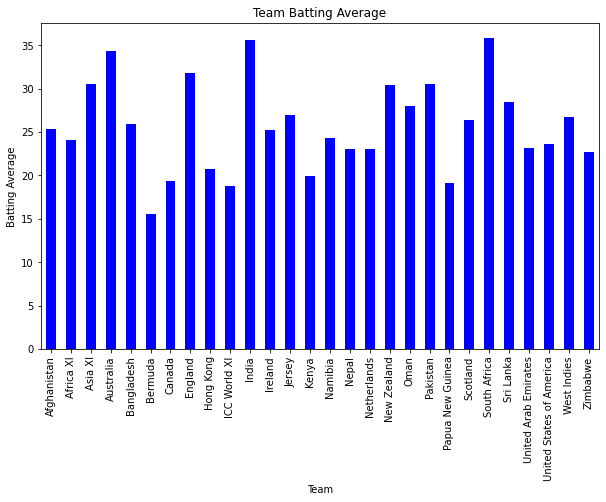

In [9]:
# Plot team batting average
plt.figure(figsize=(10, 6))
team_batting_avg.plot(kind='bar', color='blue')
plt.title('Team Batting Average')
plt.xlabel('Team')
plt.ylabel('Batting Average')

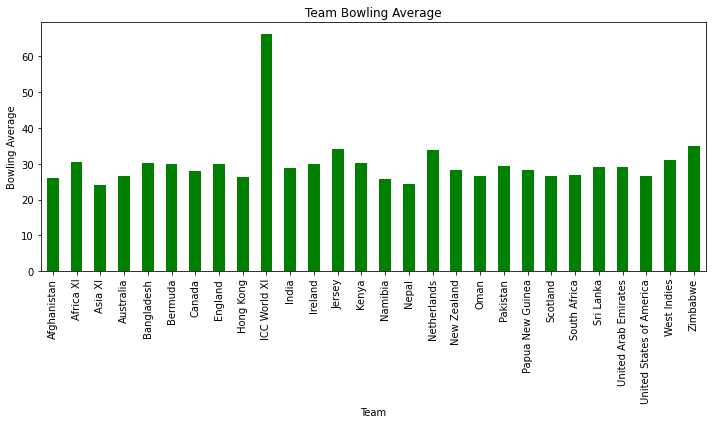

In [10]:
# Plot team bowling average
plt.figure(figsize=(10, 6))
team_bowling_avg.plot(kind='bar', color='green')
plt.title('Team Bowling Average')
plt.xlabel('Team')
plt.ylabel('Bowling Average')
plt.tight_layout()
plt.show()

,Extra Type,Runs Given
0,wides,34910.0
1,noballs,5243.0
2,byes,8070.0
3,legbyes,17665.0
4,penalty,90.0


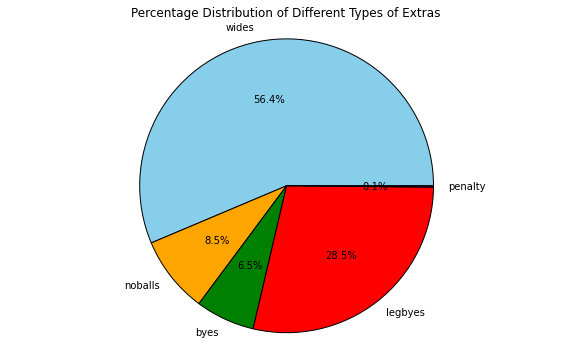

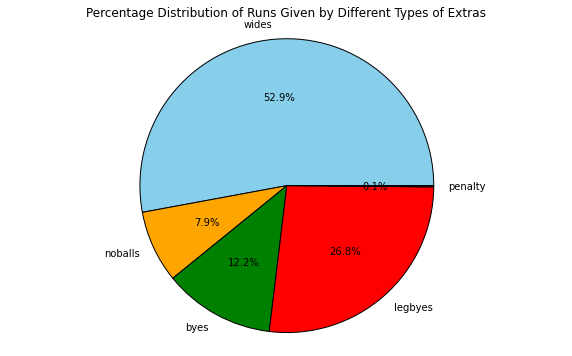

In [149]:
# Extras analysis
# Initialize a dictionary to store the runs given for each type of extra
runs_given_data = {'Extra Type': [], 'Runs Given': []}
for extra_type, runs_given in extra_runs_mapping.items():
    # Calculate the total runs given for each type of extra
    runs_given_total = odi_match_data[odi_match_data[extra_type] > 0][extra_type].sum() * runs_given
    # Append the data to the dictionary
    runs_given_data['Extra Type'].append(extra_type)
    runs_given_data['Runs Given'].append(runs_given_total)
# Creating a DataFrame for runs given by each type of extra
runs_given_df = pd.DataFrame(runs_given_data)
display(runs_given_df)
# Plotting the graphs
plt.figure(figsize=(10, 6))
plt.pie(extras_df['Count'], labels=extras_df['Extra Type'], autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple'], 
        wedgeprops=dict(edgecolor='black', linewidth=1))
plt.title('Percentage Distribution of Different Types of Extras')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
# Plotting pie chart for runs given by different types of extras
plt.figure(figsize=(10, 6))
plt.pie(runs_given_df['Runs Given'], labels=runs_given_df['Extra Type'], autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple'], 
        wedgeprops=dict(edgecolor='black', linewidth=1))
plt.title('Percentage Distribution of Runs Given by Different Types of Extras')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Team Performance Analaysis

In [11]:
# Group matches by season, venue, and teams to analyze performance trends
team_performance = odi_match_info.groupby(['season', 'venue', 'team1', 'team2', 'winner']).size().reset_index(name='matches_played')
# Evaluate the impact of toss decisions on match outcomes and team performance
# Create a new column to indicate if the toss winner won the match
odi_match_info['toss_winner_won'] = odi_match_info['toss_winner'] == odi_match_info['winner']
# Assess the correlation between winning the toss and winning matches
correlation = odi_match_info['toss_winner_won'].corr(odi_match_info['winner'].notnull())
print("Correlation between winning the toss and winning matches:", correlation)

Correlation between winning the toss and winning matches: 0.21922521774844017


In [114]:
# Analyze team performance trends over different seasons, venues, and against specific opponents
print("Team Performance Trends:")
display(team_performance.head(10))
toss_winner_avgwin = odi_match_info[odi_match_info['toss_winner_won']]['winner'].value_counts(normalize=True) * 100

Team Performance Trends:


,season,venue,team1,team2,winner,matches_played
0,2002/03,Adelaide Oval,England,Australia,Australia,1
1,2002/03,Adelaide Oval,England,Sri Lanka,England,1
2,2002/03,"Bellerive Oval, Hobart",Australia,England,Australia,1
3,2002/03,"Boland Bank Park, Paarl",Canada,Sri Lanka,Sri Lanka,1
4,2002/03,"Boland Bank Park, Paarl",India,Netherlands,India,1
5,2002/03,"Boland Bank Park, Paarl",Pakistan,Netherlands,Pakistan,1
6,2002/03,"Brisbane Cricket Ground, Woolloongabba, Brisbane",Sri Lanka,Australia,Australia,1
7,2002/03,"Buffalo Park, East London",Netherlands,England,England,1
8,2002/03,"Buffalo Park, East London",South Africa,Canada,South Africa,1
9,2002/03,"Buffalo Park, East London",Sri Lanka,Zimbabwe,Sri Lanka,1


In [115]:
# Calculate average wins for matches where the toss winner lost
toss_winner_avgl = odi_match_info[~odi_match_info['toss_winner_won']]['winner'].value_counts(normalize=True) * 100
print("\nImpact of Toss Decisions on Match Outcomes:")
display("Average wins when Toss Winner Won:", toss_winner_avgwin)
display("Average wins when Toss Winner Lost:", toss_winner_avgl)


Impact of Toss Decisions on Match Outcomes:


'Average wins when Toss Winner Won:'

India                       13.274336
Australia                   11.415929
Sri Lanka                    9.469027
South Africa                 9.380531
England                      9.292035
New Zealand                  8.318584
Pakistan                     8.318584
Bangladesh                   5.840708
West Indies                  5.663717
Zimbabwe                     3.097345
Ireland                      2.477876
Afghanistan                  2.389381
Scotland                     2.212389
Nepal                        1.592920
United Arab Emirates         1.238938
Namibia                      1.238938
Oman                         1.061947
Netherlands                  0.973451
United States of America     0.796460
Canada                       0.442478
Papua New Guinea             0.442478
Kenya                        0.442478
Hong Kong                    0.265487
Asia XI                      0.265487
Jersey                       0.088496
Name: winner, dtype: float64

'Average wins when Toss Winner Lost:'

Australia                   12.931798
India                       12.400354
Sri Lanka                    9.477414
South Africa                 9.388840
Pakistan                     9.300266
England                      9.211692
New Zealand                  7.971656
West Indies                  6.377325
Bangladesh                   5.491585
Zimbabwe                     2.834367
Afghanistan                  2.568645
Ireland                      2.214349
United Arab Emirates         1.771479
Scotland                     1.771479
United States of America     1.151461
Nepal                        0.885740
Oman                         0.885740
Kenya                        0.708592
Namibia                      0.620018
Netherlands                  0.531444
Papua New Guinea             0.531444
Canada                       0.442870
Hong Kong                    0.265722
Bermuda                      0.177148
Africa XI                    0.088574
Name: winner, dtype: float64

Player Performance Analysis

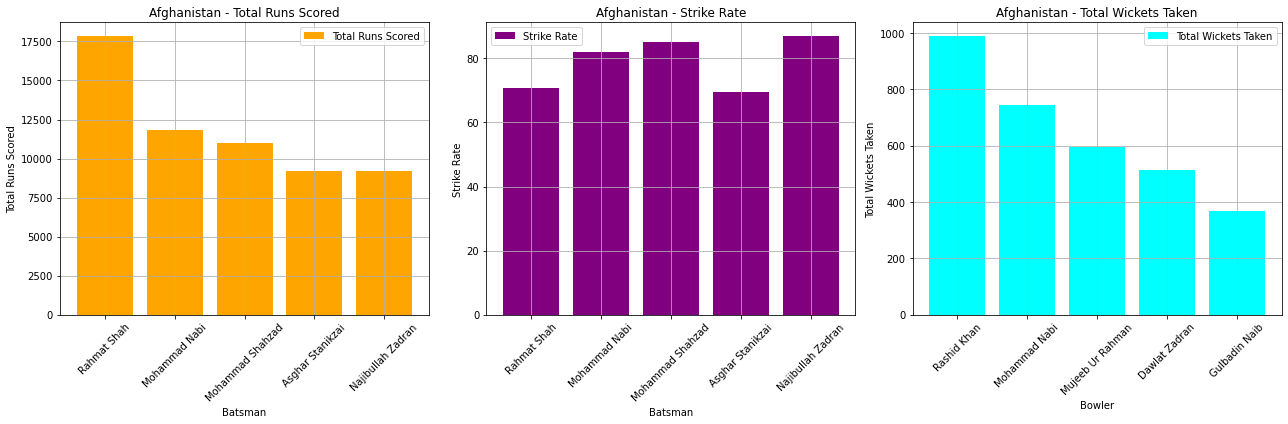

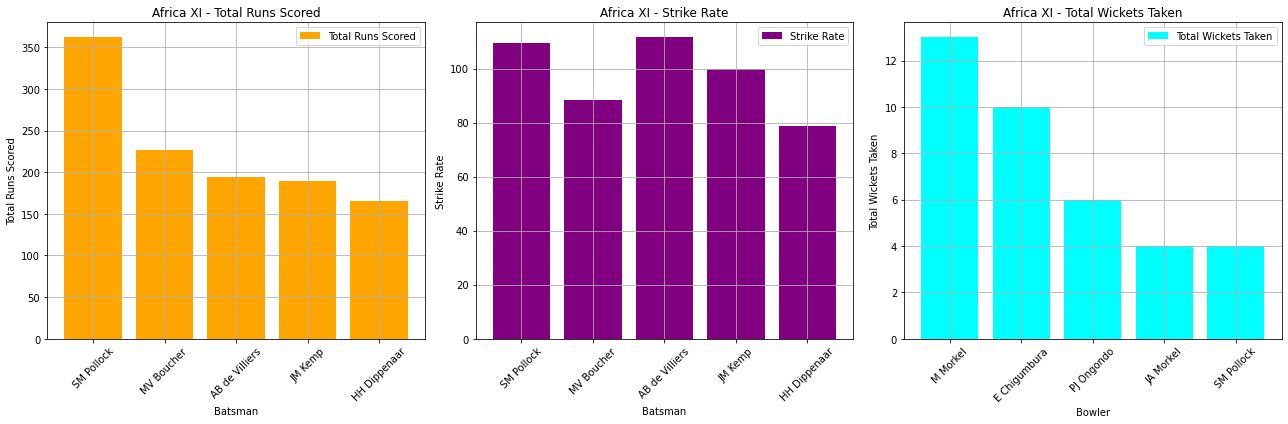

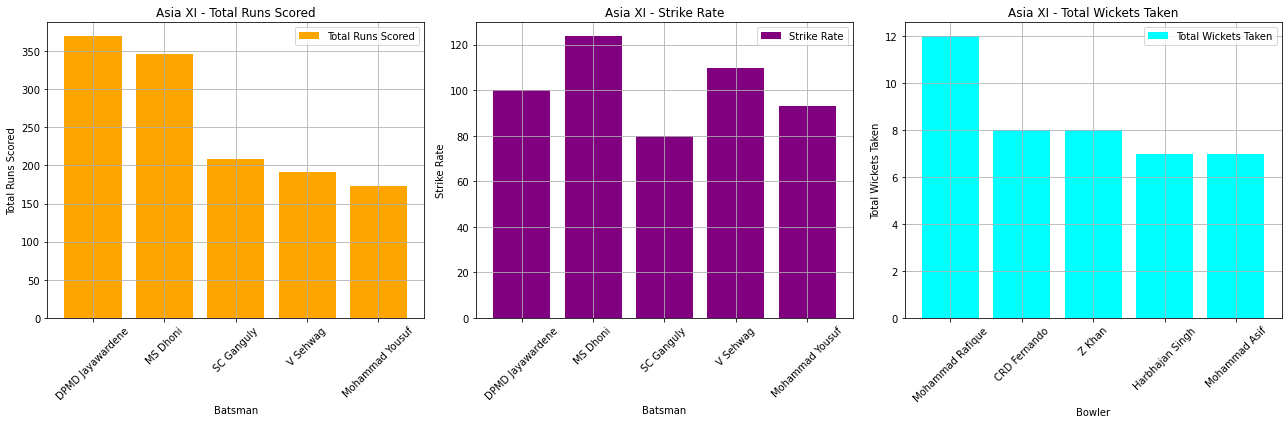

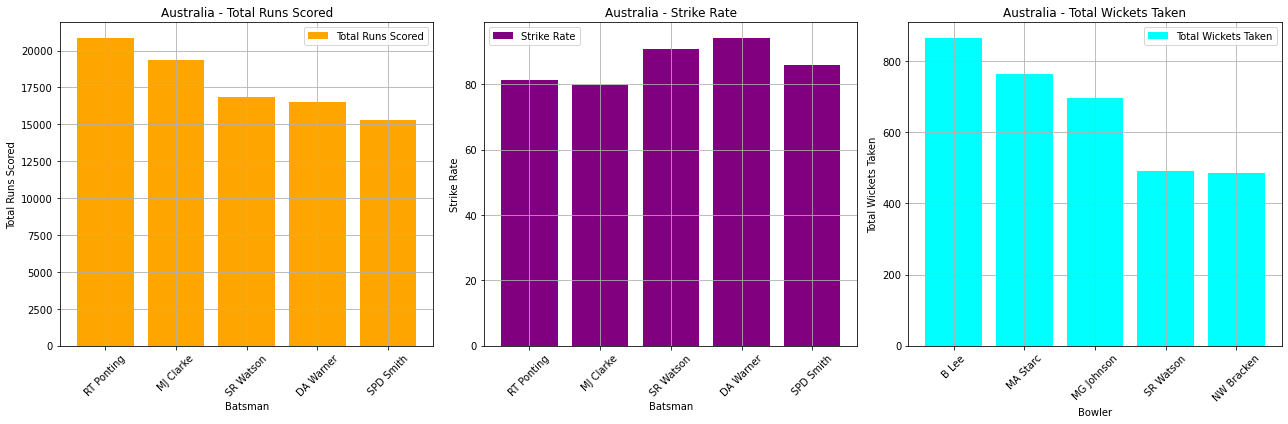

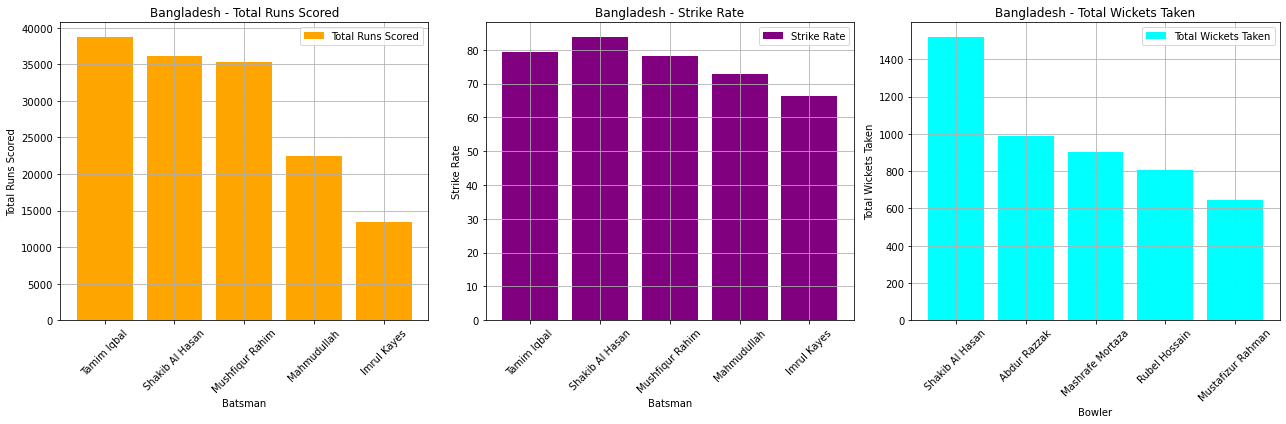

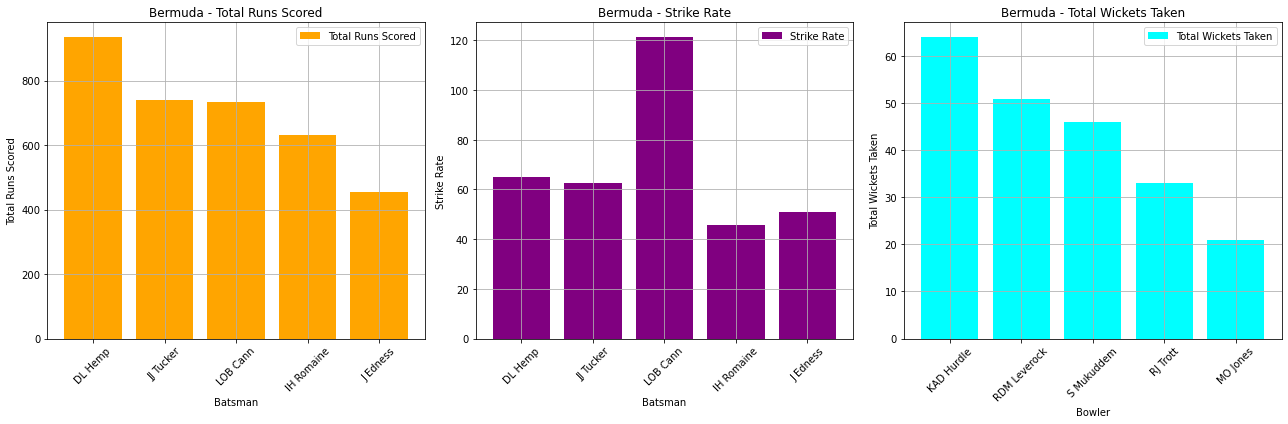

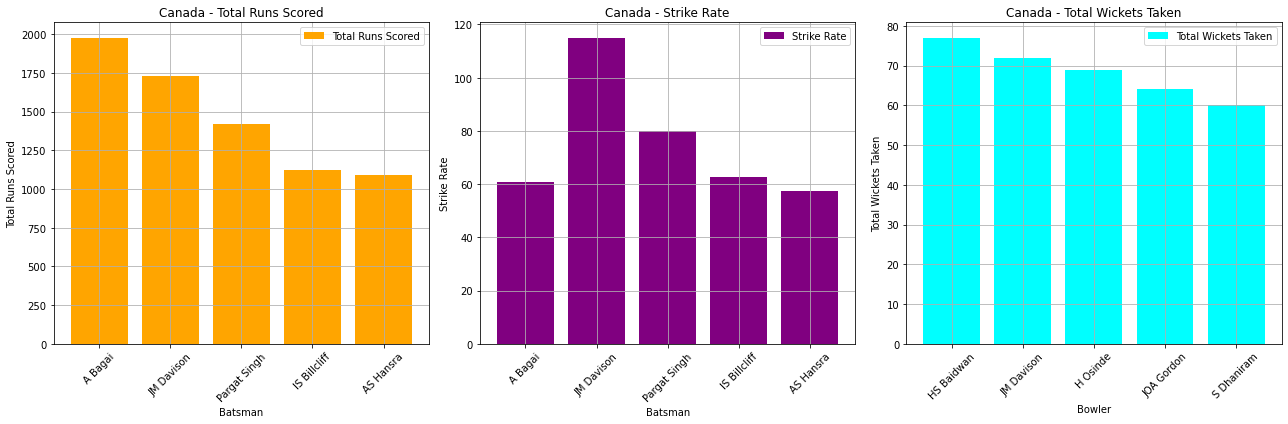

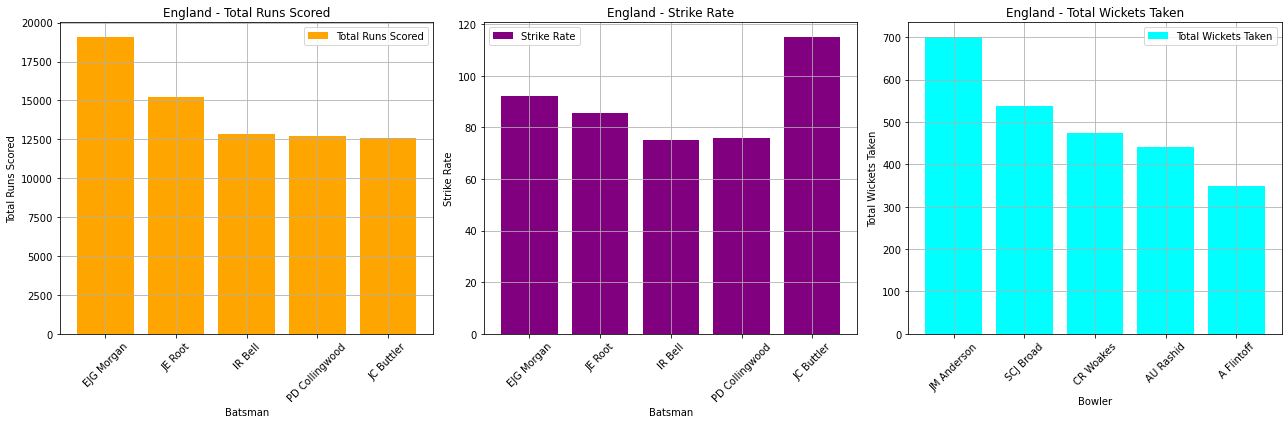

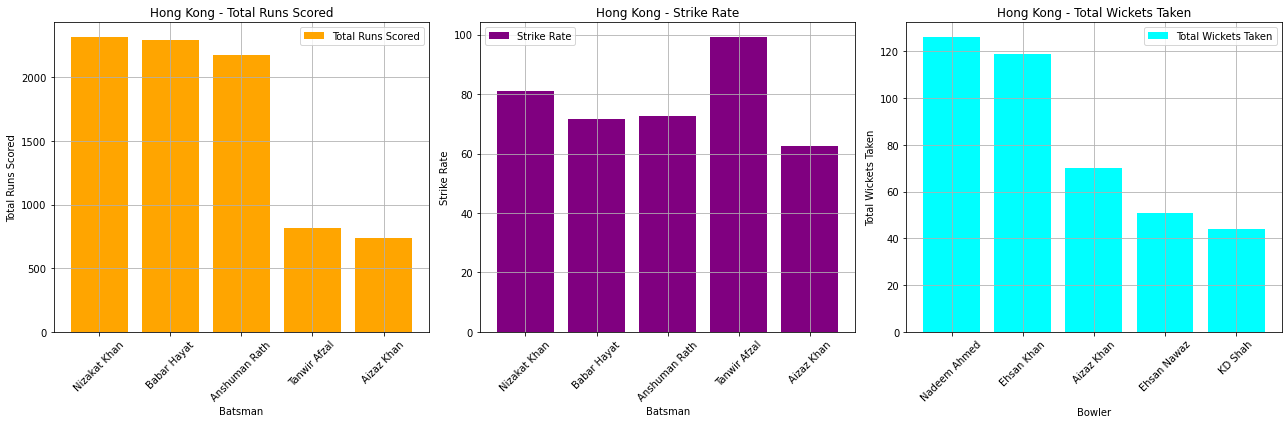

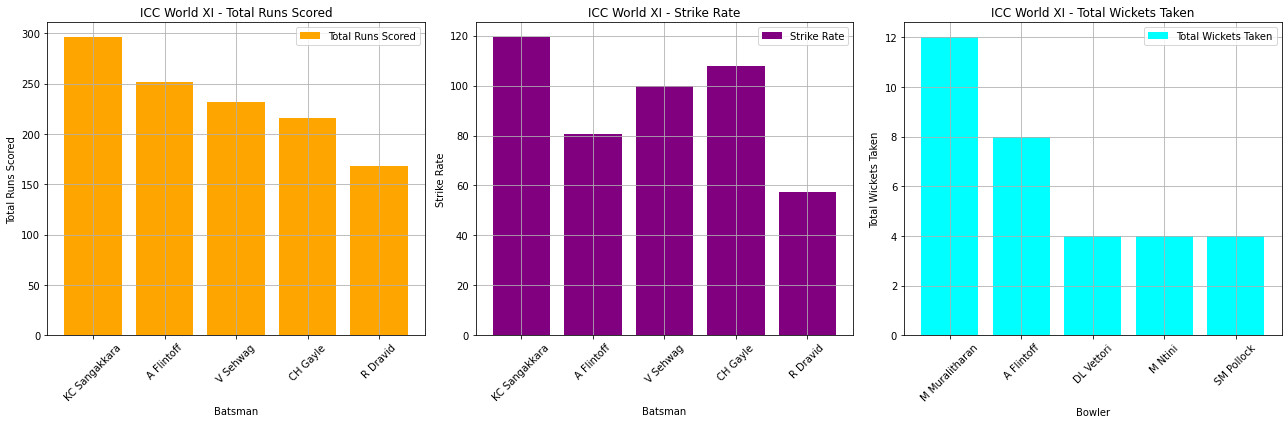

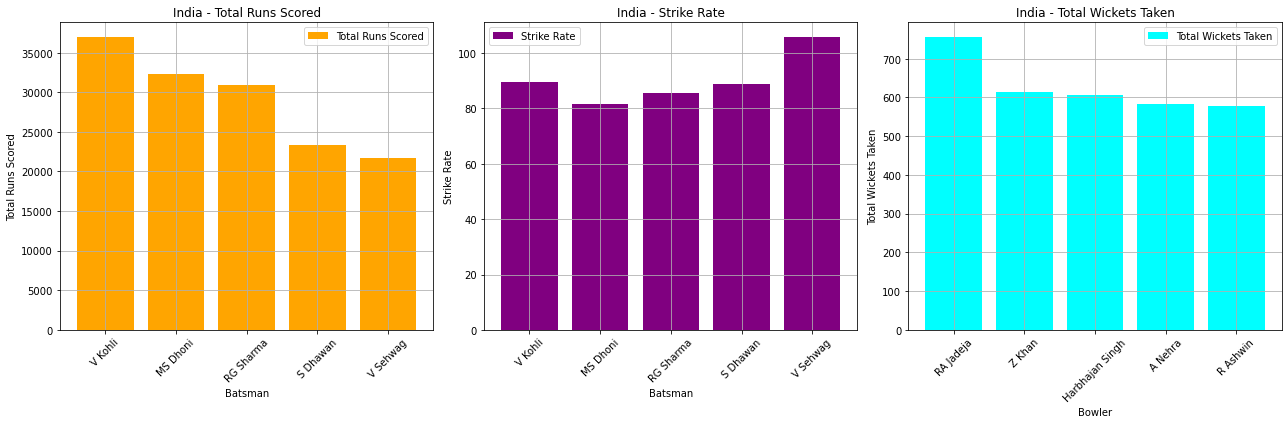

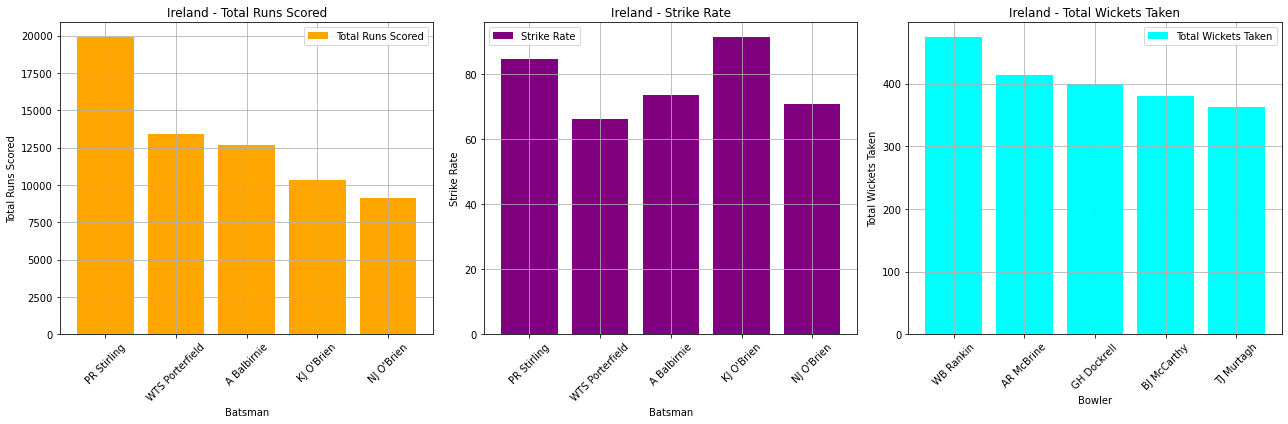

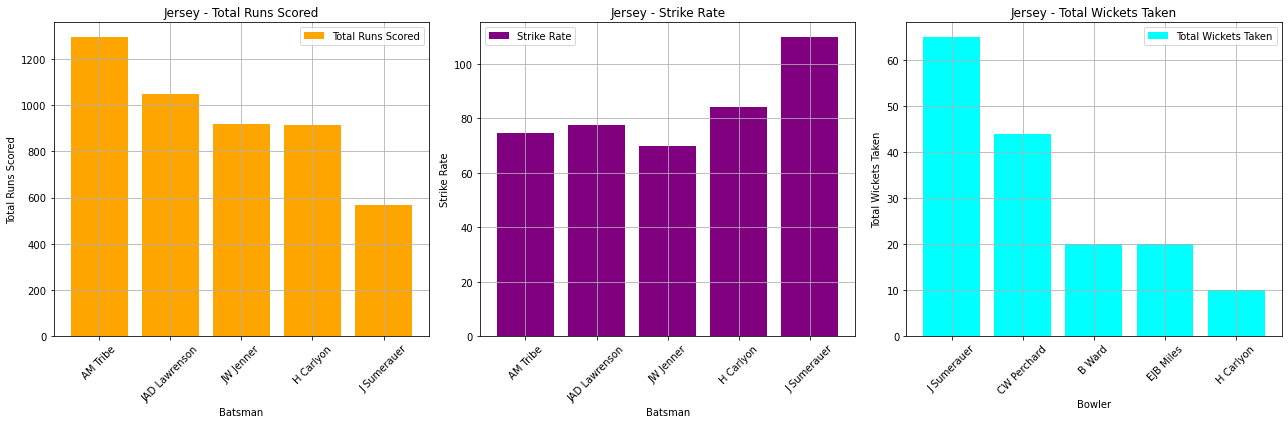

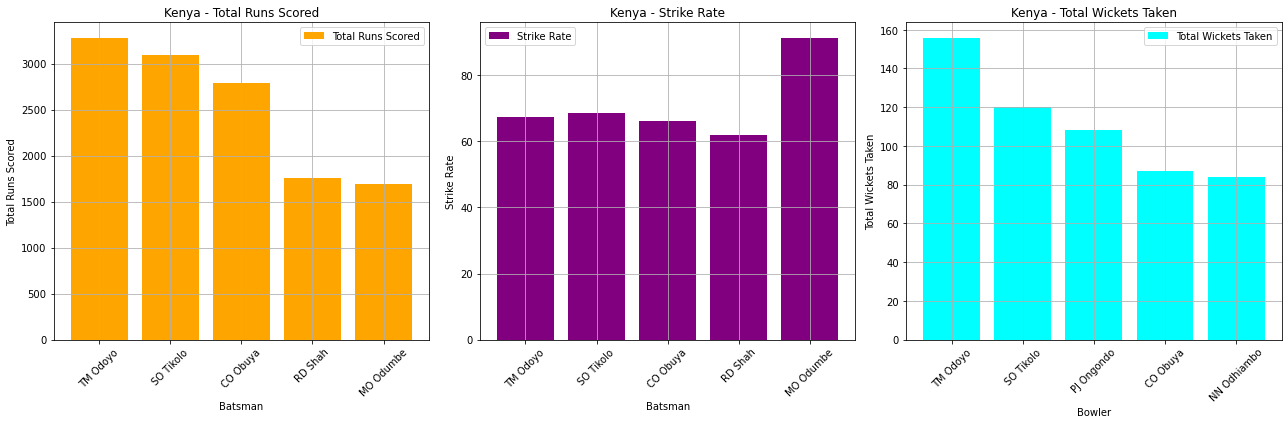

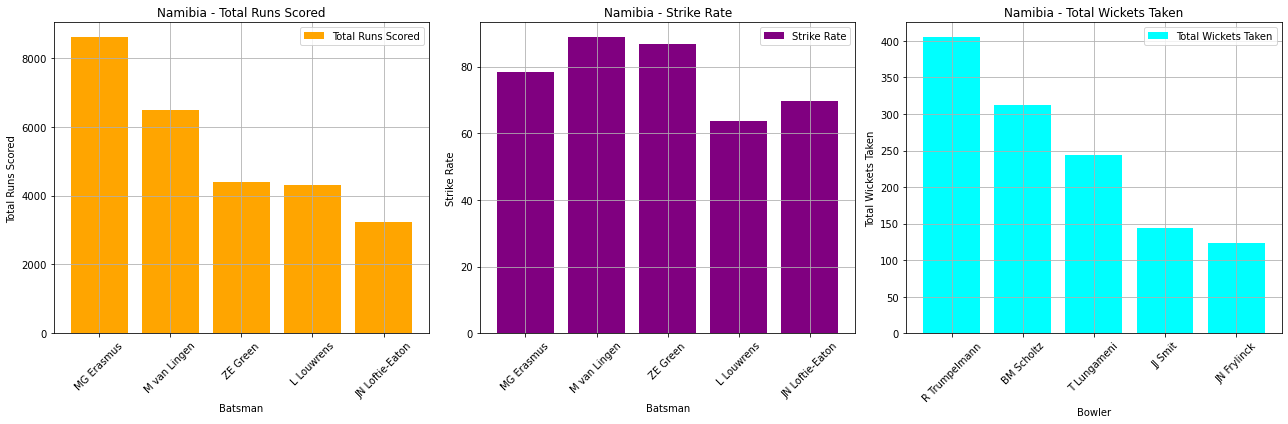

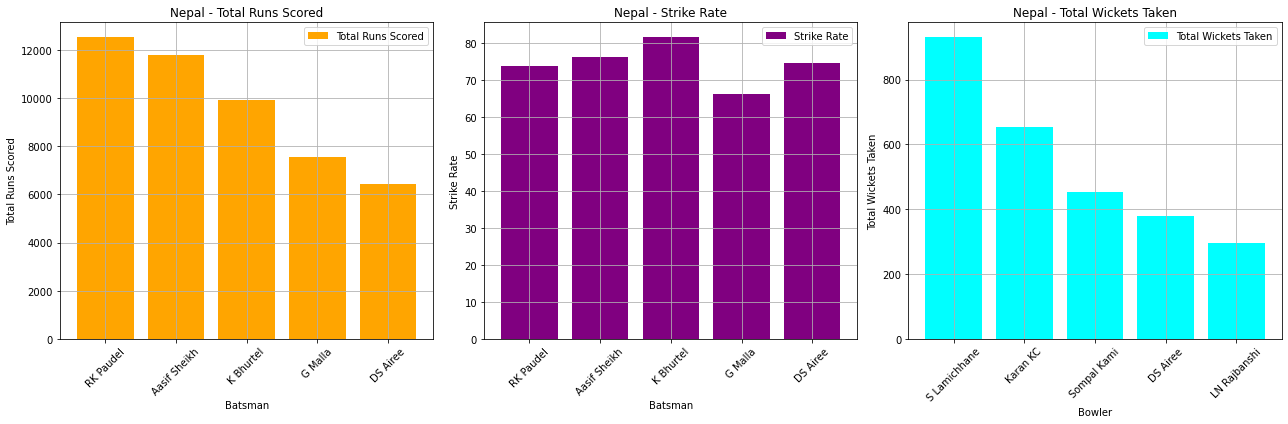

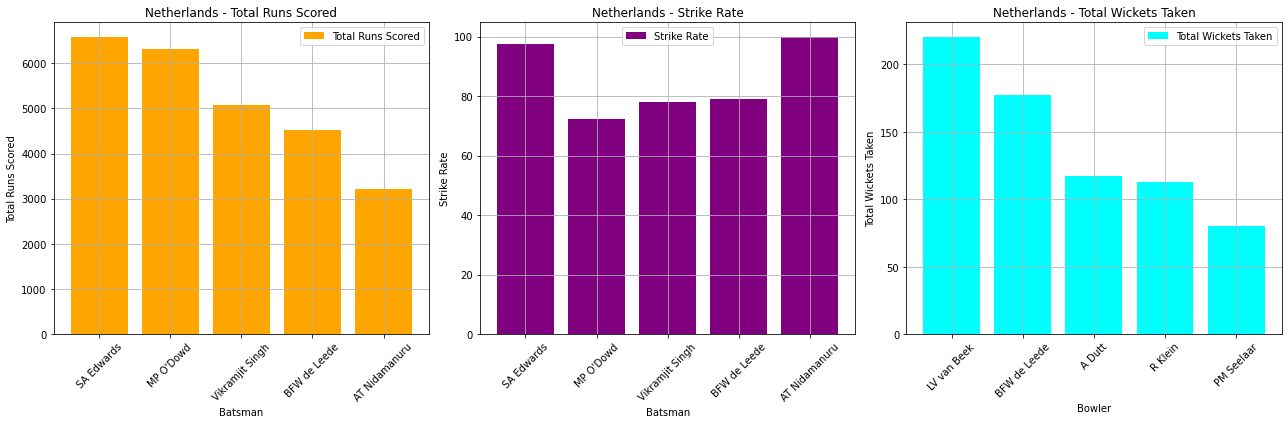

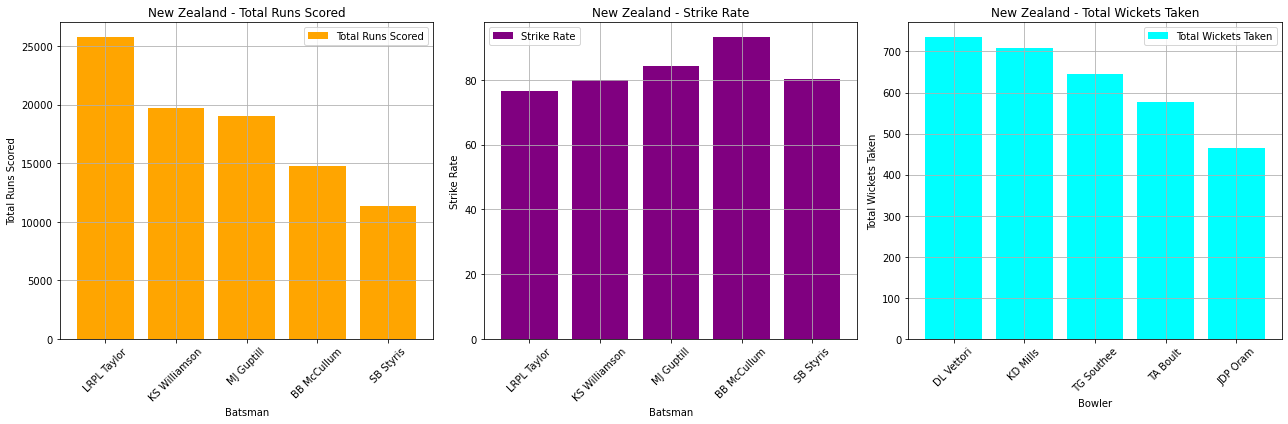

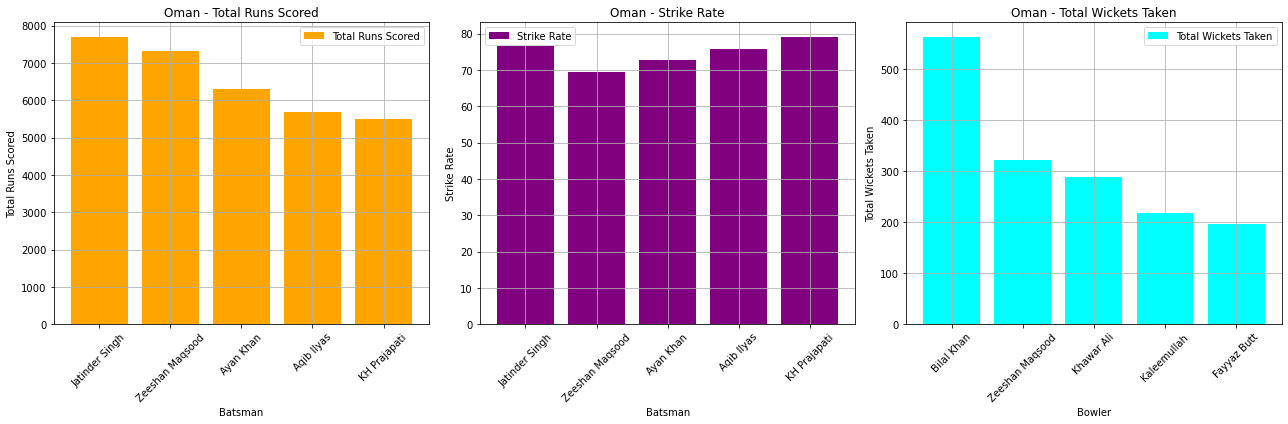

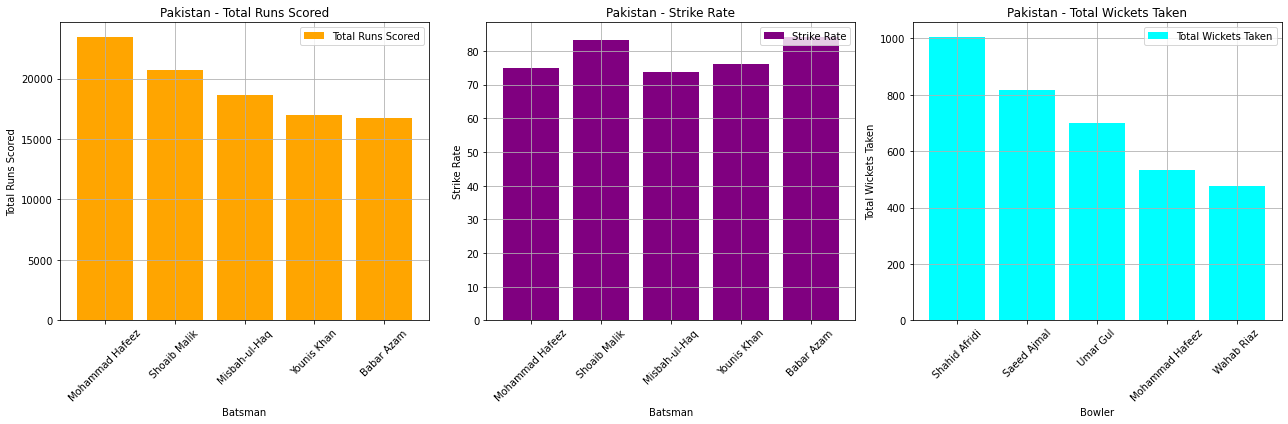

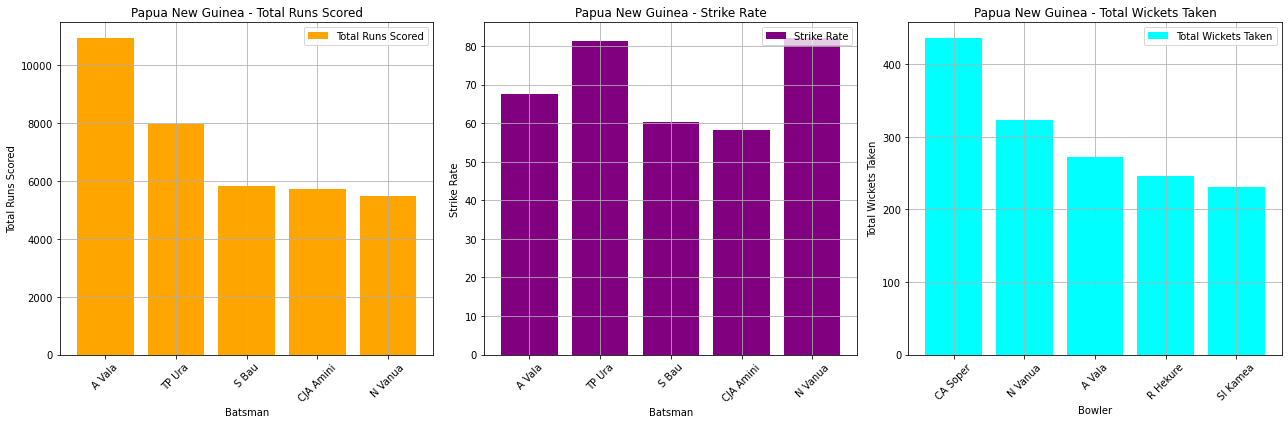

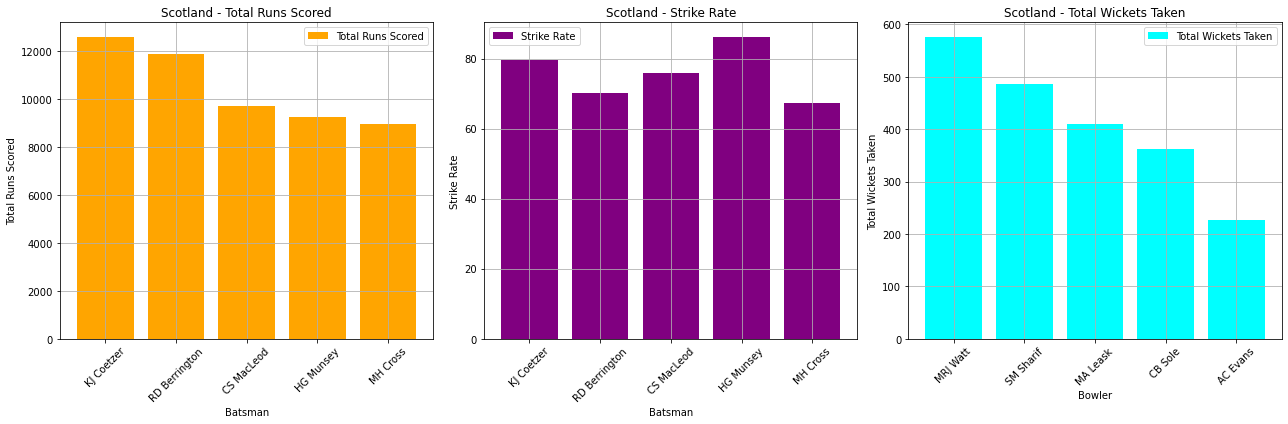

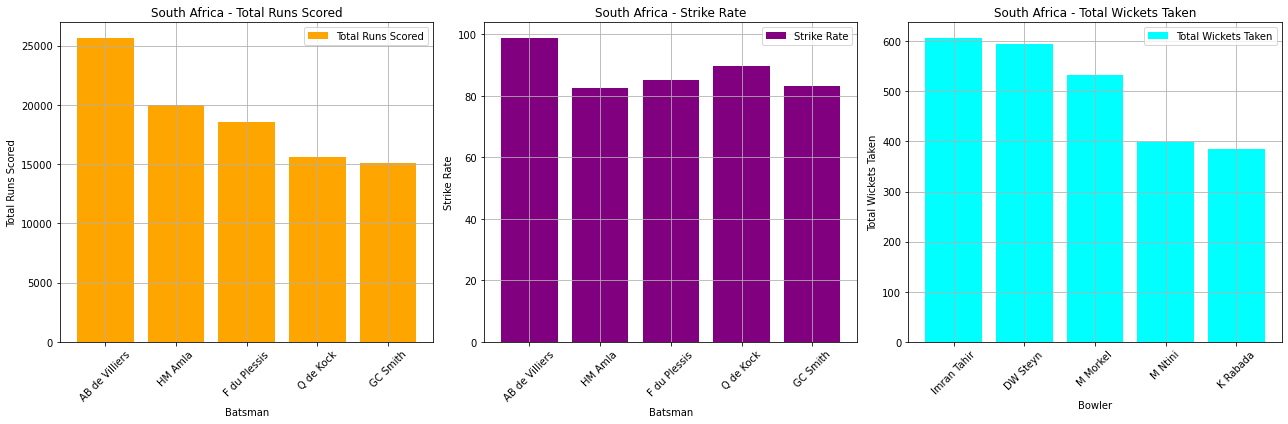

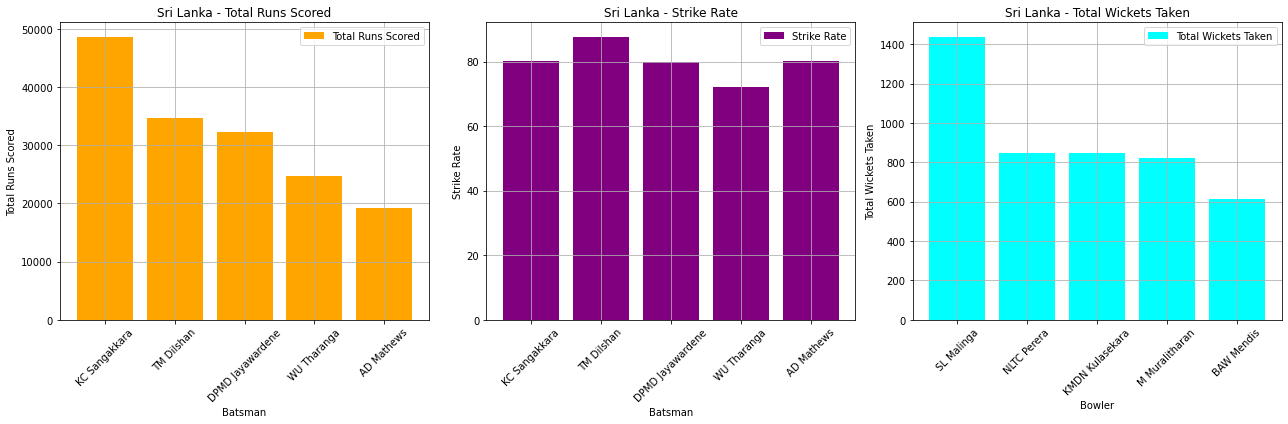

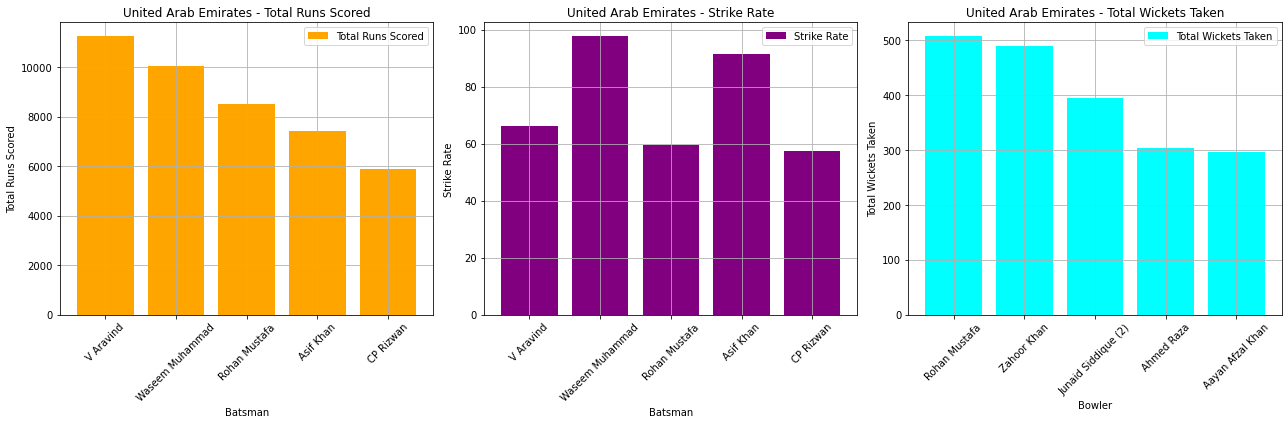

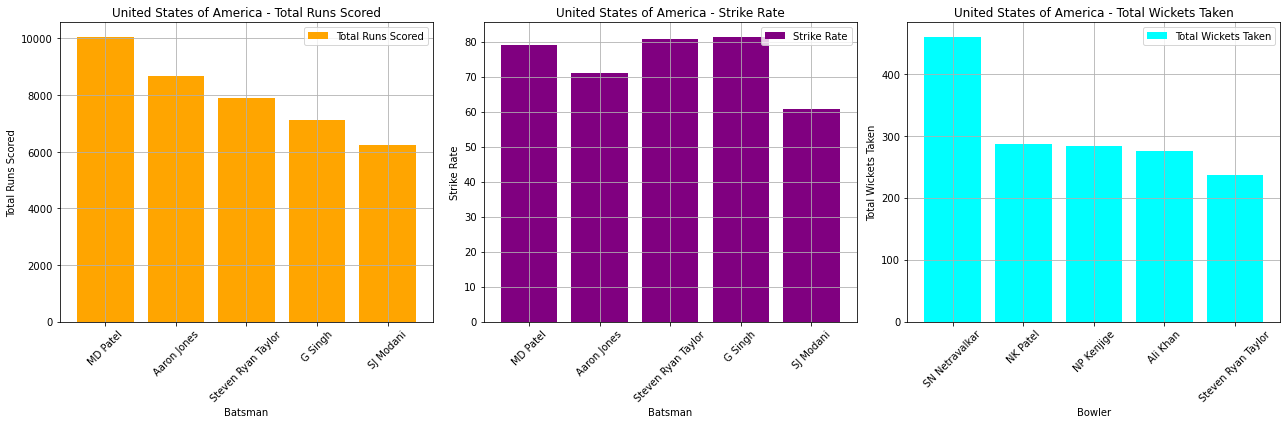

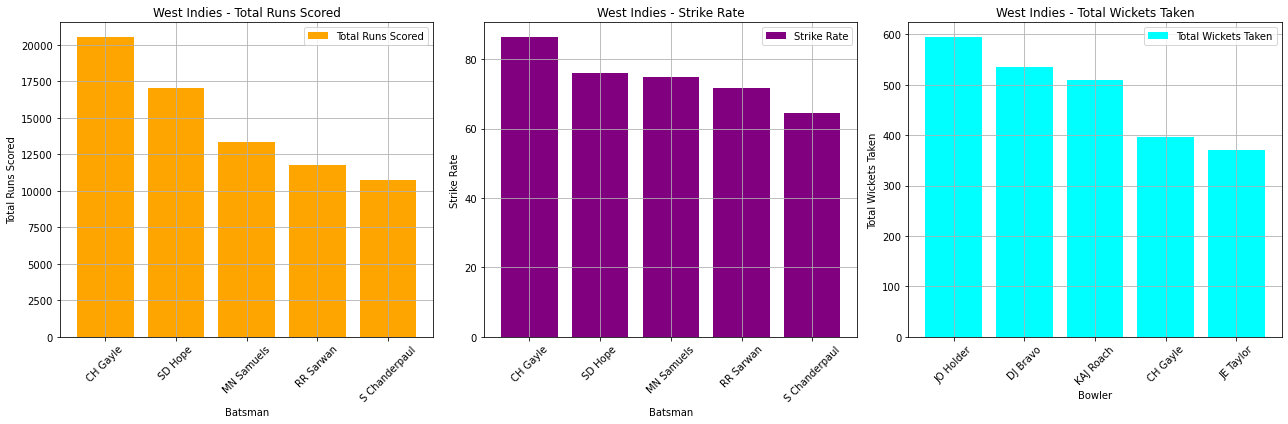

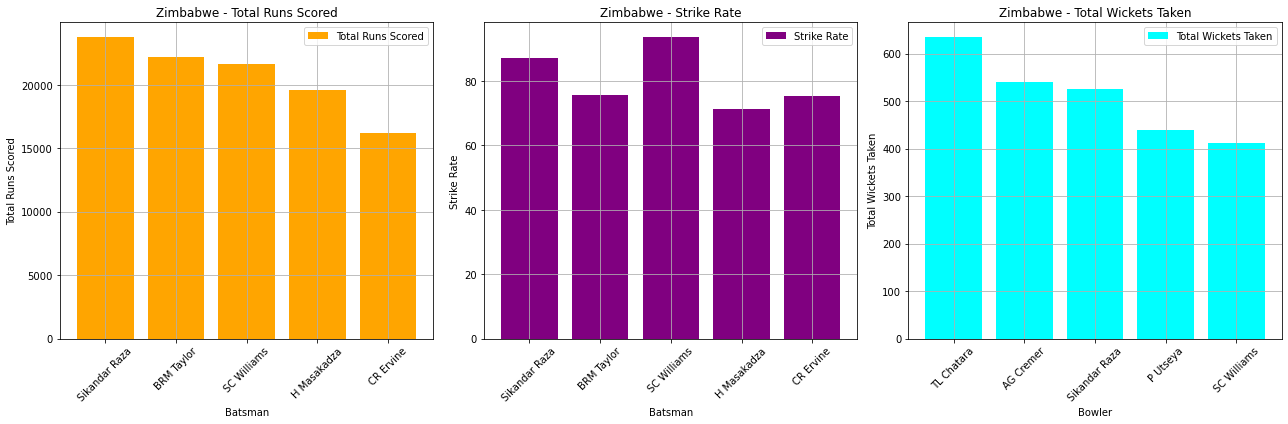

In [28]:
#Calculate batting and bowling statistics
merged_data = pd.merge(odi_match_data, odi_match_info, on=['season', 'venue'], how='inner')
batting_stats = merged_data.groupby(['batting_team', 'striker']).agg({'runs_off_bat': 'sum', 'ball': 'count'}).reset_index()
bowling_stats = merged_data.groupby(['bowling_team', 'bowler']).agg({'player_dismissed': 'count'}).reset_index()
#Filter top 5 batsmen and bowlers for each country
top_batsmen = batting_stats.groupby('batting_team').apply(lambda x: x.nlargest(5, 'runs_off_bat')).reset_index(drop=True)
top_bowlers = bowling_stats.groupby('bowling_team').apply(lambda x: x.nlargest(5, 'player_dismissed')).reset_index(drop=True)
#Plot total runs scored, strike rate, and total wickets taken country-wise
for team in top_batsmen['batting_team'].unique():
    batting_data = top_batsmen[top_batsmen['batting_team'] == team]
    bowling_data = top_bowlers[top_bowlers['bowling_team'] == team] 
    plt.figure(figsize=(18, 6))    
    # Plot total runs scored
    plt.subplot(1, 3, 1)
    plt.bar(batting_data['striker'], batting_data['runs_off_bat'], label='Total Runs Scored', color='orange')
    plt.xlabel('Batsman')
    plt.ylabel('Total Runs Scored')
    plt.title(f'{team} - Total Runs Scored')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    # Plot strike rate
    plt.subplot(1, 3, 2)
    plt.bar(batting_data['striker'], (batting_data['runs_off_bat'] / batting_data['ball']) * 100, label='Strike Rate', color='purple')
    plt.xlabel('Batsman')
    plt.ylabel('Strike Rate')
    plt.title(f'{team} - Strike Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)    
    # Plot total wickets taken
    plt.subplot(1, 3, 3)
    plt.bar(bowling_data['bowler'], bowling_data['player_dismissed'], label='Total Wickets Taken', color='cyan')
    plt.xlabel('Bowler')
    plt.ylabel('Total Wickets Taken')
    plt.title(f'{team} - Total Wickets Taken')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)    
    plt.tight_layout()
    plt.show()

Venue Analysis

In [89]:
# Count the number of games played at each venue
venue_counts = odi_match_info['venue'].value_counts().reset_index()
# Rename the columns for clarity
venue_counts.columns = ['venue', 'games_played']
# Display the DataFrame
display(venue_counts)

,venue,games_played
0,Harare Sports Club,113
1,Shere Bangla National Stadium,90
2,Sydney Cricket Ground,47
3,R Premadasa Stadium,47
4,Dubai International Cricket Stadium,47
...,...,...
288,"Riverway Stadium, Townsville",1
289,Goodyear Park,1
290,"Grange Cricket Club Ground, Raeburn Place, Edi...",1
291,Indian Petrochemicals Corporation Limited Spor...,1


In [87]:
# Group data by venue
venue_stats = odi_match_data.groupby('venue')
# Calculate average scores, run rates, and wicket-taking rates
venue_analysis = venue_stats.agg({'runs_off_bat': 'mean', 
                                  'ball': 'count', 
                                  'wicket_type': lambda x: (x != 'Not Applicable').sum() / len(x) * 6})
# Rename columns for clarity
venue_analysis.rename(columns={'runs_off_bat': 'Average runs per balls faced', 
                                'ball': 'Total Balls', 
                                'wicket_type': 'Wickets per Innings'}, inplace=True)
# Sort venues by average score in descending order
venue_analysis = venue_analysis.sort_values(by='Average runs per balls faced', ascending=False)
# Calculate overall average score across all venues
mean_avg_score = venue_analysis['Average runs per balls faced'].mean()
print("Venue Analysis:")
print("Average Scores, Run Rates, and Wicket-Taking Rates at Different Cricket Venues:")
display(venue_analysis)
print(venue_analysis.info())

Venue Analysis:
Average Scores, Run Rates, and Wicket-Taking Rates at Different Cricket Venues:


,Average runs per balls faced,Total Balls,Wickets per Innings
venue,,,
"Holkar Cricket Stadium, Indore",1.189293,1046,6.0
Barsapara Cricket Stadium,1.106007,566,6.0
"Barsapara Cricket Stadium, Guwahati",1.078303,613,6.0
"Edgbaston, Birmingham",1.057947,604,6.0
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",1.053140,621,6.0
...,...,...,...
"Nahar Singh Stadium, Faridabad",0.492260,323,6.0
"Westpac Park, Hamilton",0.482456,456,6.0
"Davies Park, Queenstown",0.468182,440,6.0


<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, Holkar Cricket Stadium, Indore to Queen's Park Oval
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Average runs per balls faced  293 non-null    float64
 1   Total Balls                   293 non-null    int64  
 2   Wickets per Innings           293 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.2+ KB
None


In [116]:
# Merge datasets
merged_data = pd.merge(odi_match_data, odi_match_info, left_on='match_id', right_on='id', how='inner')
# Batting Analysis: Calculate total runs scored and number of matches played by each team at each venue
batting_analysis = merged_data.groupby(['venue_x', 'batting_team']).agg({'runs_off_bat': 'sum', 'match_id': 'nunique'}).reset_index()
batting_analysis.rename(columns={'match_id': 'matches_played'}, inplace=True)
batting_analysis= batting_analysis.sort_values(by='runs_off_bat', ascending=False)
# Bowling Analysis: Calculate average wickets taken by each team at each venue
bowling_analysis = merged_data.groupby(['venue_x', 'bowling_team'])['wicket_type'].apply(lambda x: (x != 'Not Applicable').sum() / len(x) * 6).reset_index()
bowling_analysis.rename(columns={'wicket_type': 'average_wickets'}, inplace=True)
# Winning Games Analysis: Calculate win percentage of each team at each venue
total_matches = merged_data.groupby(['venue_x', 'winner']).size().reset_index(name='total_matches')
wins = merged_data.groupby(['venue_x', 'winner']).size().reset_index(name='wins')
winning_games_analysis = pd.merge(total_matches, wins, on=['venue_x', 'winner'], how='left')
winning_games_analysis['win_percentage'] = (winning_games_analysis['wins'] / winning_games_analysis['total_matches']) * 100
# Group winning games analysis by venue and get the row with the maximum wins for each venue
strongest_country_per_venue = winning_games_analysis.loc[winning_games_analysis.groupby('venue_x')['wins'].idxmax()]
strongest_country_per_venue= strongest_country_per_venue.sort_values(by='total_matches', ascending=False)
strongest_country_per_venue['win_percentage'] = (strongest_country_per_venue['wins'] / strongest_country_per_venue['total_matches']) * 100
# Print the result
print("Country with 100% Wins in a venue:")
display(strongest_country_per_venue[['venue_x', 'winner']].head())

Country with 100% Wins in a venue:


,venue_x,winner
683,Shere Bangla National Stadium,Bangladesh
258,Harare Sports Club,Zimbabwe
748,Sydney Cricket Ground,Australia
411,Melbourne Cricket Ground,Australia
554,R Premadasa Stadium,Sri Lanka


In [13]:
print("Batting Analysis:")
display(batting_analysis.head())
print("\nBowling Analysis:")
display(bowling_analysis.head())


Batting Analysis:


,venue_x,batting_team,runs_off_bat,matches_played
431,Harare Sports Club,Zimbabwe,17658,93
1104,Shere Bangla National Stadium,Bangladesh,15098,75
1198,Sydney Cricket Ground,Australia,10457,41
912,R Premadasa Stadium,Sri Lanka,8945,42
685,Melbourne Cricket Ground,Australia,8011,33



Bowling Analysis:


,venue_x,bowling_team,average_wickets
0,AMI Stadium,Bangladesh,6.0
1,AMI Stadium,England,6.0
2,AMI Stadium,India,6.0
3,AMI Stadium,New Zealand,6.0
4,AMI Stadium,Pakistan,6.0


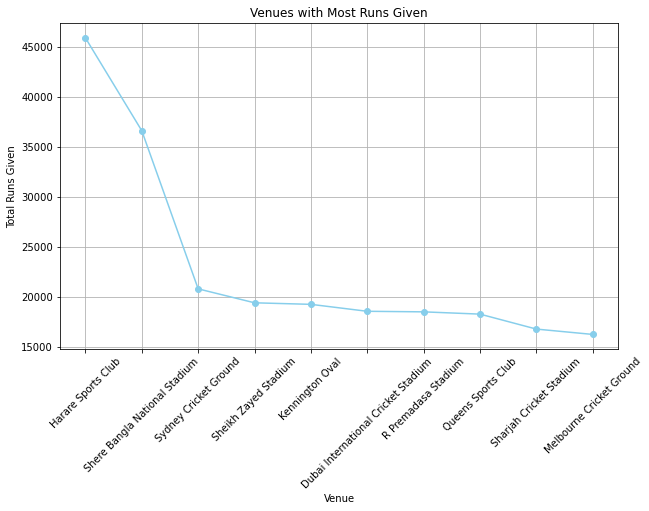

In [150]:
# Plot venue with most runs given
plt.figure(figsize=(10, 6))
plt.plot(most_runs_given, marker='o', color='skyblue', linestyle='-')
plt.title('Venues with Most Runs Given')
plt.xlabel('Venue')
plt.ylabel('Total Runs Given')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Innings Analysis

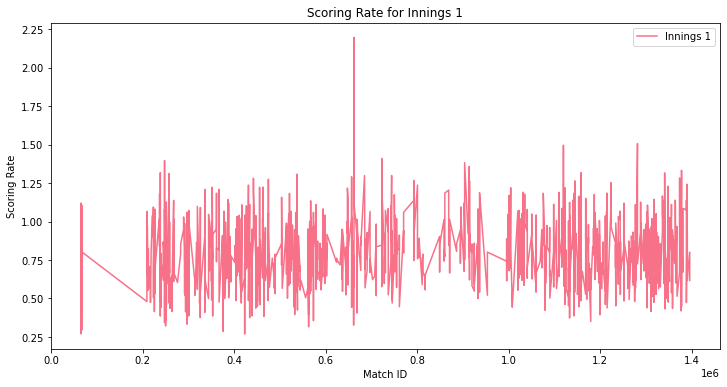

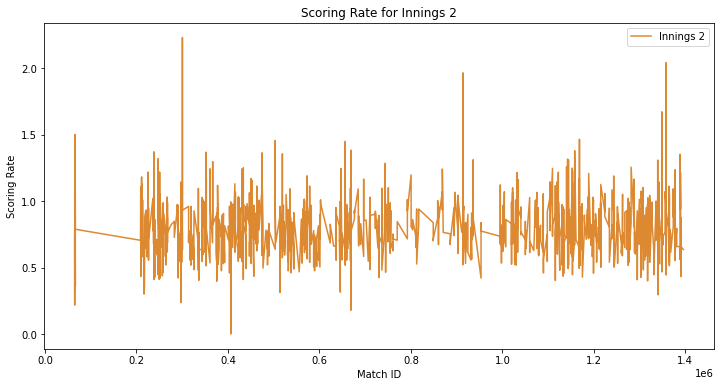

In [39]:
# Analyze the scoring rate and run distribution for each innings
# Group data by innings, batting_team, and match_id to calculate scoring rate and run distribution
innings_analysis = odi_match_data.groupby(['match_id', 'innings', 'batting_team'])['runs_off_bat'].agg(['sum', 'count']).reset_index()
innings_analysis.rename(columns={'sum': 'total_runs', 'count': 'balls_faced'}, inplace=True)
innings_analysis['scoring_rate'] = innings_analysis['total_runs'] / innings_analysis['balls_faced']
innings_analysis = innings_analysis[innings_analysis['innings'].isin([1, 2])]
# Plotting scoring rate for the innings
unique_innings = innings_analysis['innings'].unique()
palette = sns.color_palette("husl", 10)
for inning, color in zip(unique_innings, palette):
    inning_data = innings_analysis[innings_analysis['innings'] == inning]
    plt.figure(figsize=(12, 6))
    plt.plot(inning_data['match_id'], inning_data['scoring_rate'], label=f'Innings {inning}', color=color)
    plt.xlabel('Match ID')
    plt.ylabel('Scoring Rate')
    plt.title(f'Scoring Rate for Innings {inning}')
    plt.legend()
    plt.show()

In [45]:
# Group data by match_id and batting_team to identify successful batting orders
successful_batting_orders = odi_match_data.groupby(['match_id', 'batting_team']).size().reset_index(name='balls_faced')
successful_batting_orders = successful_batting_orders.sort_values(by='balls_faced', ascending=False).head(10)

print("Teams with long lasting Openers:")
display(successful_batting_orders)

Teams with long lasting Openers:


,match_id,batting_team,balls_faced
521,225250,Sri Lanka,326
417,66368,New Zealand,326
1053,297802,India,324
84,64883,India,323
662,247460,Sri Lanka,323
788,249238,New Zealand,323
1279,360800,South Africa,322
678,247468,India,322
333,65803,Pakistan,322
4488,1358080,United Arab Emirates,322


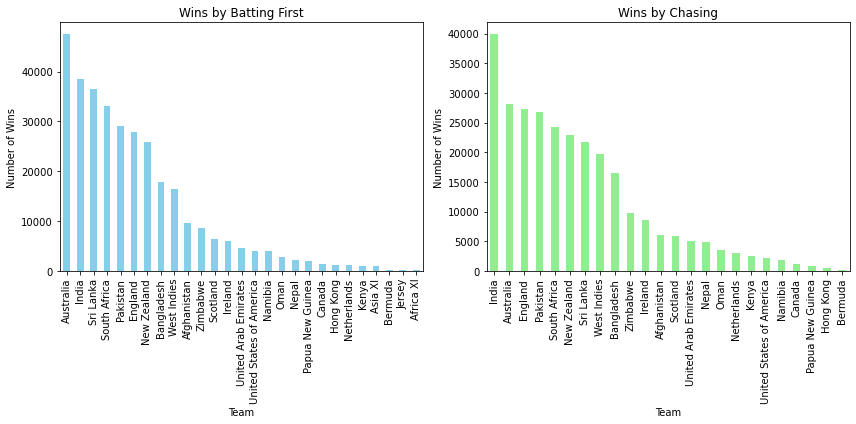

In [48]:
# Group data by winner and innings to count wins by batting in the first and second innings
merged_data = pd.merge(odi_match_data, odi_match_info, left_on='match_id', right_on='id', how='inner')
# Filter matches where the winning team batted first
winning_team_batting_first = merged_data[(merged_data['batting_team'] == merged_data['winner']) & (merged_data['innings'] == 1)]
# Filter matches where the winning team batted second
winning_team_batting_second = merged_data[(merged_data['batting_team'] == merged_data['winner']) & (merged_data['innings'] == 2)]
# Count occurrences of each team winning by batting first and second
batting_first_counts = winning_team_batting_first['winner'].value_counts()
batting_second_counts = winning_team_batting_second['winner'].value_counts()
# Plot the results
plt.figure(figsize=(12, 6))
# Plot for winning by batting first
plt.subplot(1, 2, 1)
batting_first_counts.plot(kind='bar', color='skyblue')
plt.title('Wins by Batting First')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
# Plot for winning by batting second
plt.subplot(1, 2, 2)
batting_second_counts.plot(kind='bar', color='lightgreen')
plt.title('Wins by Chasing')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

Wicket Analysis

In [53]:
# Impact of key wickets on match outcomes
wicket_types = odi_match_data['wicket_type'].value_counts()
print("Types of wickets taken:")
display(wicket_types)
key_wickets_impact = odi_match_data[odi_match_data['wicket_type'].isin(['bowled', 'caught', 'lbw'])]['player_dismissed'].value_counts()
print("Impact of key wickets on match outcomes:")
display(key_wickets_impact)

Types of wickets taken:


caught                   19565
bowled                    6429
lbw                       3890
run out                   2599
caught and bowled         1041
stumped                    859
retired hurt                50
hit wicket                  35
obstructing the field        6
Name: wicket_type, dtype: int64

Impact of key wickets on match outcomes:


KC Sangakkara       219
DPMD Jayawardene    205
V Kohli             203
TM Dilshan          199
Tamim Iqbal         186
                   ... 
Sayed Shirzad         1
SC Getkate            1
RJ Trott              1
SO Dowrich            1
MKGCP Lakshitha       1
Name: player_dismissed, Length: 1618, dtype: int64

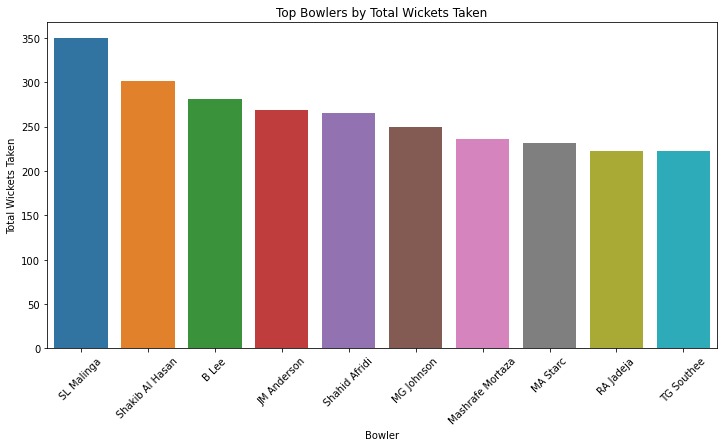

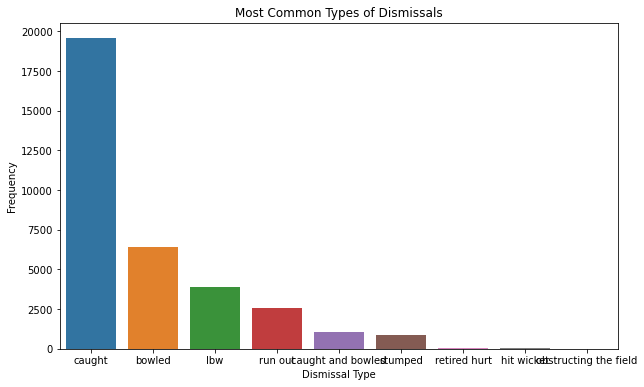

In [152]:
# Calculate total wickets taken by each bowler
wickets_by_bowler = odi_match_data.groupby('bowler')['wicket_type'].count().reset_index(name='wickets')
top_bowlers = wickets_by_bowler.sort_values(by='wickets', ascending=False).head(10)
# Plot graph for most wickets taken
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers)
plt.title('Top Bowlers by Total Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45)
plt.show()
# Wicket analysis
wickets_type = odi_match_data['wicket_type'].value_counts()
# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x=wickets_type.index, y=wickets_type.values)
plt.title('Most Common Types of Dismissals')
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.show()

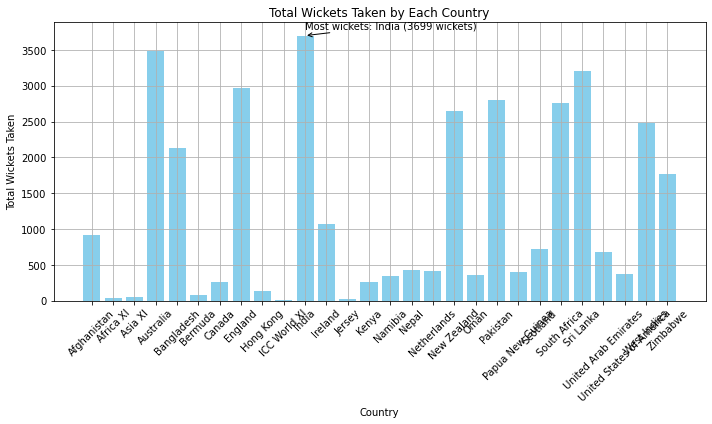

In [154]:
# Group by bowling team and match result to calculate total wickets taken
wickets_summary = wickets_by_result_summary.groupby('bowling_team')['wickets'].sum()
# Find the country with the most wickets taken
country_most_wickets = wickets_summary.idxmax()
most_wickets_count = wickets_summary.max()
# Plot the result
plt.figure(figsize=(10, 6))
plt.bar(wickets_summary.index, wickets_summary.values, color='skyblue')
plt.title('Total Wickets Taken by Each Country')
plt.xlabel('Country')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45)
plt.grid(True)
plt.annotate(f'Most wickets: {country_most_wickets} ({most_wickets_count} wickets)', xy=(country_most_wickets, most_wickets_count),
             xytext=(country_most_wickets, most_wickets_count + 100), arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.tight_layout()
plt.show()

In [157]:
#Correlation between total wickets taken and total victories
# Merge the match data and match information
merged_data = pd.merge(odi_match_data, odi_match_info, left_on='match_id', right_on='id', how='inner')
# Calculate total wickets taken by each team
wickets_per_team = merged_data.groupby('bowling_team')['wicket_type'].count().reset_index()
wickets_per_team.columns = ['team', 'total_wickets']
# Calculate total victories for each team
victories_per_team = merged_data.groupby('winner').size().reset_index(name='total_victories')
# Perform correlation analysis
correlation = wickets_per_team['total_wickets'].corr(victories_per_team['total_victories'])
print("Correlation between total wickets taken and total victories:", correlation)

Correlation between total wickets taken and total victories: 0.23195377823000143


Umpire Analysis

In [15]:
# Concatenate umpire columns into a single column
umpires = pd.concat([odi_match_info['umpire1'], odi_match_info['umpire2'], odi_match_info['umpire3']])
# Create a DataFrame to store umpire data
umpire_df = pd.DataFrame({'umpire': umpires})
# Count the number of matches officiated by each umpire
umpire_counts = umpire_df['umpire'].value_counts().reset_index()
umpire_counts.columns = ['umpire', 'matches_officiated']
# Find the most officiated stadium for each umpire
umpire_stadium_counts = umpire_df.merge(odi_match_info[['umpire1', 'umpire2', 'umpire3', 'venue']], left_on='umpire', right_on='umpire1', how='left')
umpire_stadium_counts = umpire_stadium_counts.groupby(['umpire', 'venue']).size().reset_index(name='matches_count')
umpire_most_officiated_stadium = umpire_stadium_counts.sort_values(by='matches_count', ascending=False).drop_duplicates('umpire')
# Find the most officiated country for each umpire
umpire_country_counts = umpire_df.merge(odi_match_info[['umpire1', 'umpire2', 'umpire3', 'team1', 'team2']], left_on='umpire', right_on='umpire1', how='left')
umpire_country_counts = umpire_country_counts.groupby(['umpire', 'team1']).size().reset_index(name='matches_count')
umpire_most_officiated_country = umpire_country_counts.sort_values(by='matches_count', ascending=False).drop_duplicates('umpire')
# Merge all findings into a single DataFrame
umpire_analysis = umpire_counts.merge(umpire_most_officiated_stadium[['umpire', 'venue']], on='umpire', how='left')
umpire_analysis = umpire_analysis.merge(umpire_most_officiated_country[['umpire', 'team1']], on='umpire', how='left')
umpire_analysis.columns = ['umpire', 'matches_officiated', 'most_officiated_stadium', 'most_officiated_team']
print("Umpire Analysis:")
display(umpire_analysis.head())
print(umpire_analysis.info())

Umpire Analysis:


,umpire,matches_officiated,most_officiated_stadium,most_officiated_team
0,Aleem Dar,260,Shere Bangla National Stadium,Bangladesh
1,NJ Llong,199,"Queen's Park Oval, Port of Spain",Australia
2,BF Bowden,189,Rangiri Dambulla International Stadium,Australia
3,IJ Gould,179,Harare Sports Club,India
4,HDPK Dharmasena,171,"R Premadasa Stadium, Colombo",Australia


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   umpire                   191 non-null    object
 1   matches_officiated       191 non-null    int64 
 2   most_officiated_stadium  147 non-null    object
 3   most_officiated_team     147 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.5+ KB
None


Toss Analysis

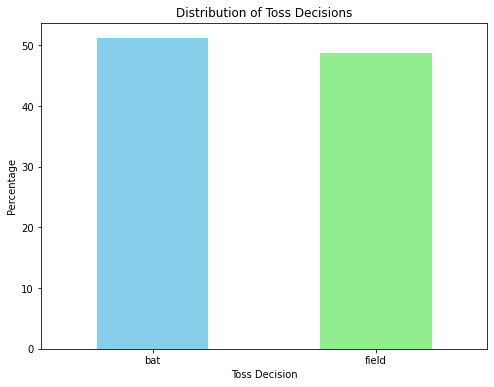

In [61]:
# Analyze the distribution of toss decisions (batting or bowling first) and their impact on match results
toss_decisions_distribution = odi_match_info['toss_decision'].value_counts(normalize=True) * 100
# Plotting the distribution of toss decisions
plt.figure(figsize=(8, 6))
toss_decisions_distribution.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Toss Decision')
plt.ylabel('Percentage')
plt.title('Distribution of Toss Decisions')
plt.xticks(rotation=0)
plt.show()

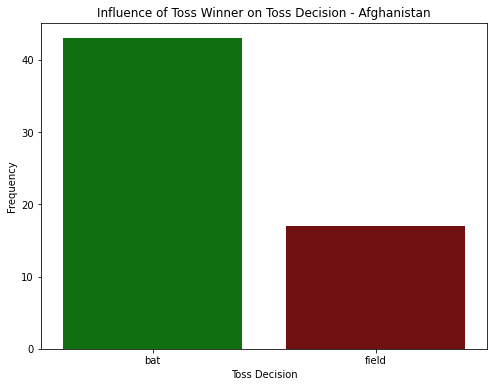

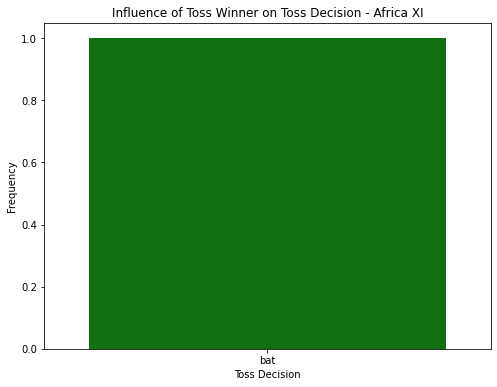

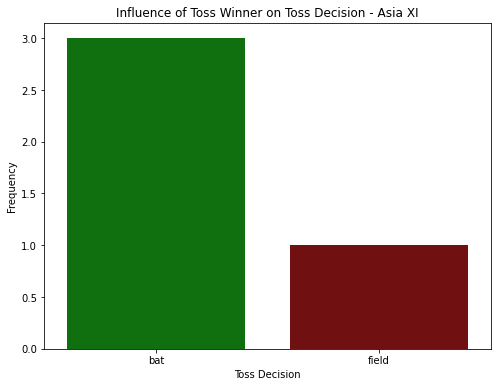

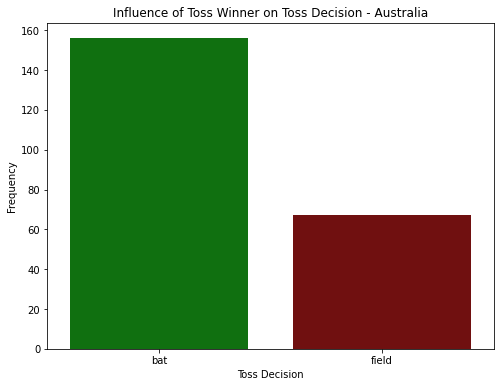

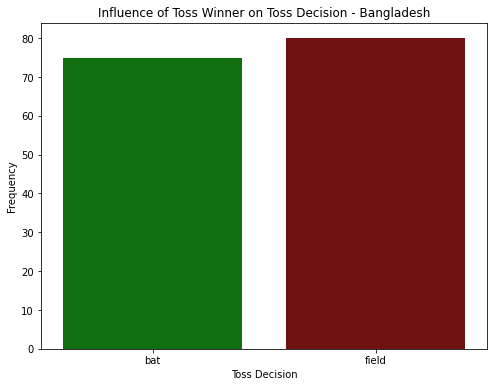

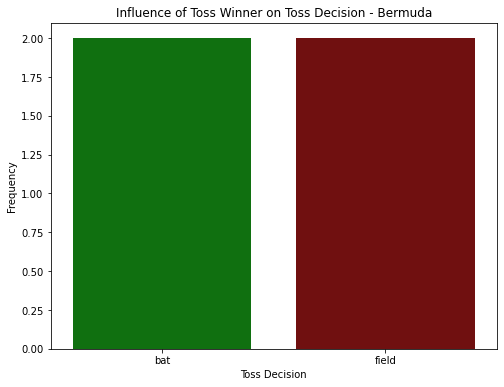

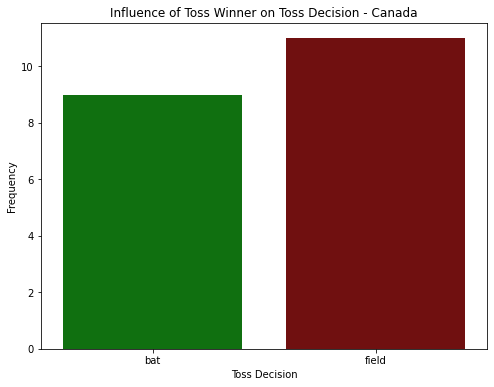

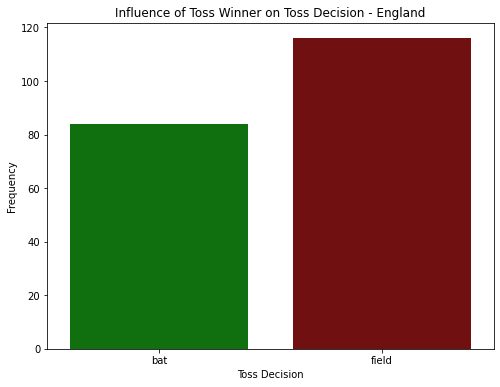

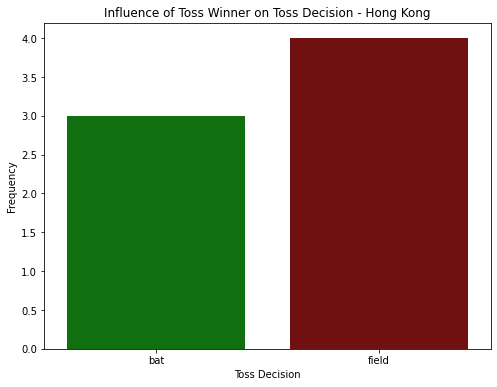

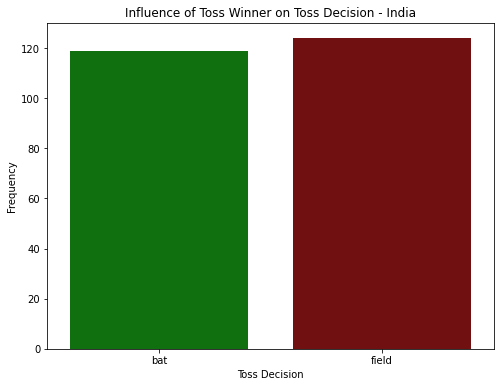

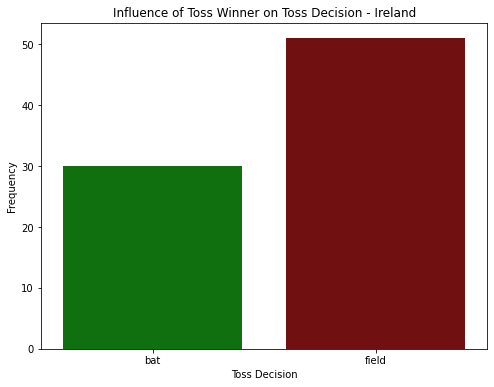

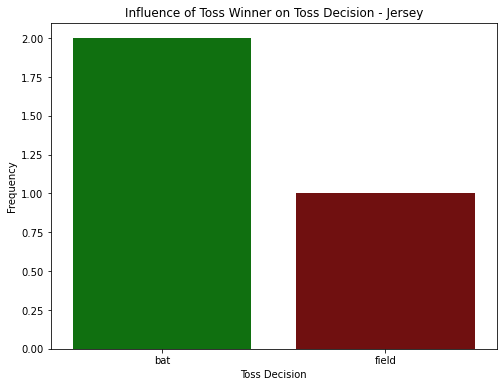

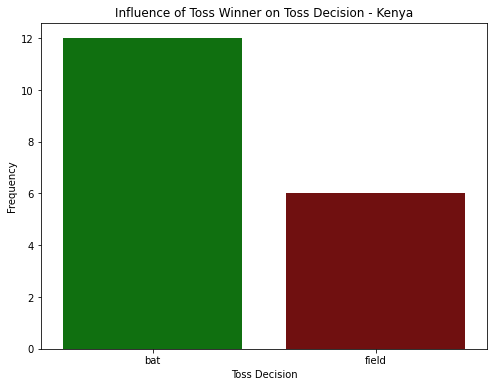

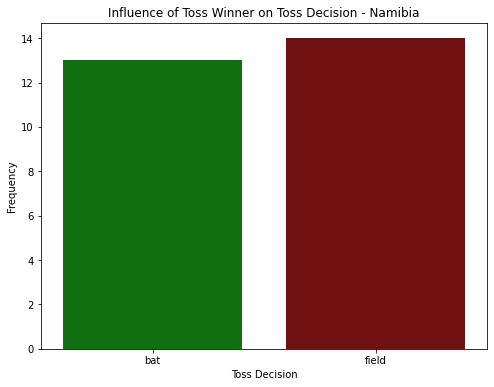

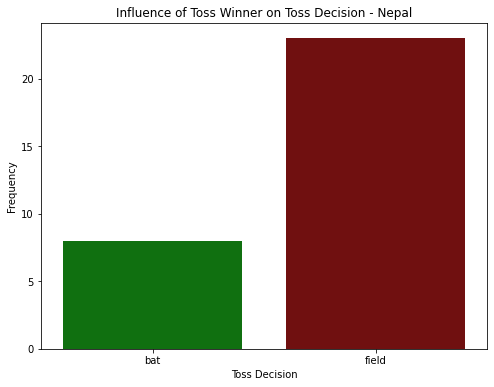

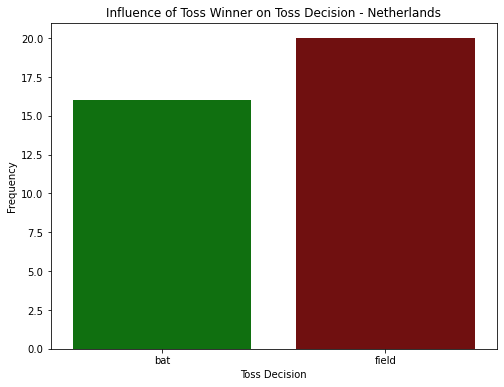

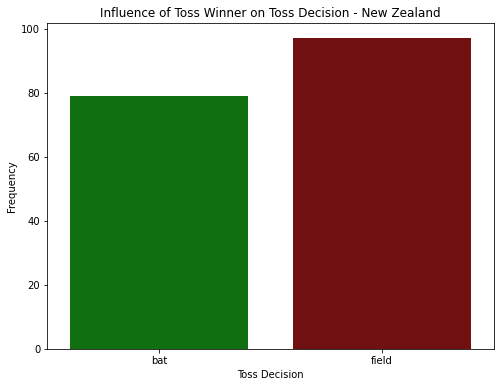

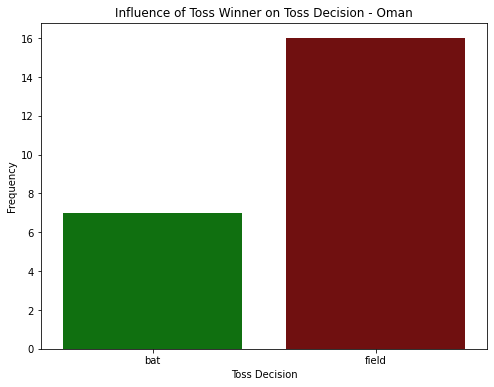

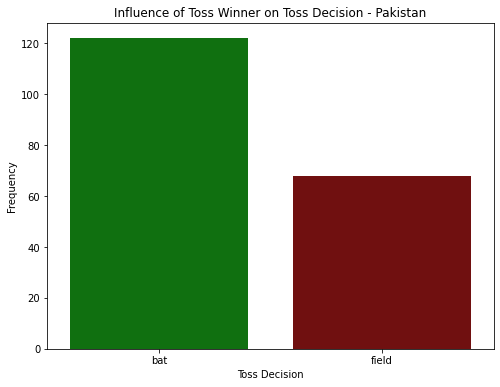

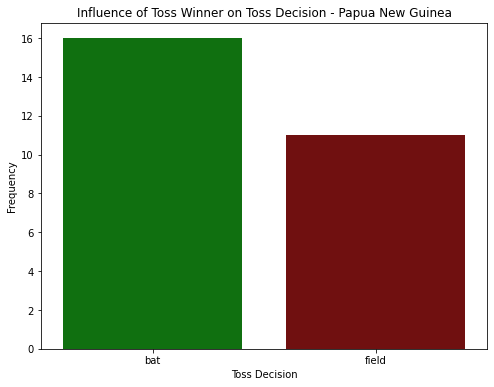

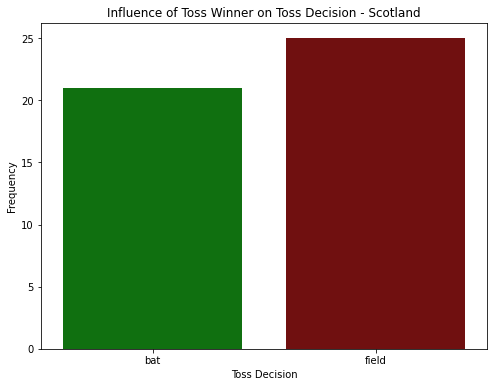

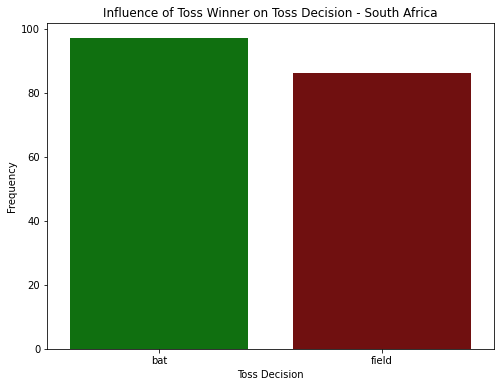

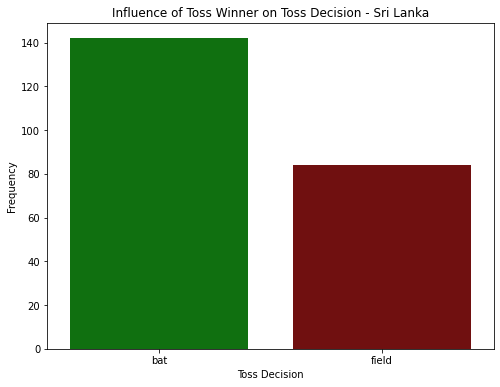

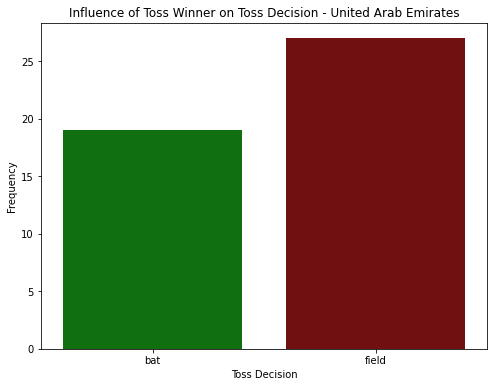

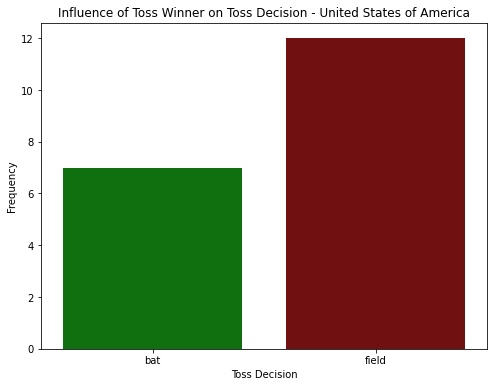

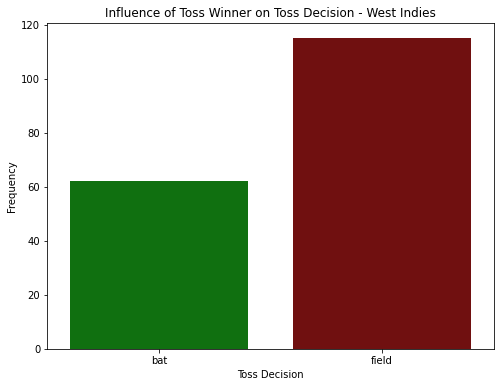

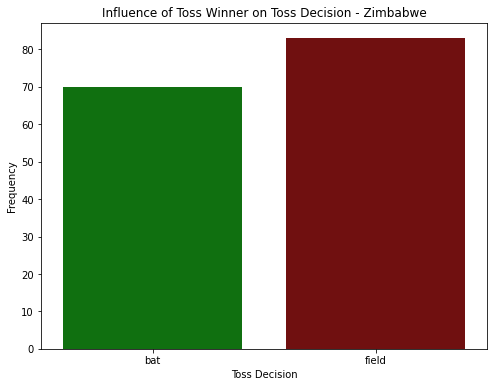

In [66]:
# Assess whether winning the toss influences the choice of fielding or batting first
toss_influence = odi_match_info.groupby(['toss_winner', 'toss_decision']).size().reset_index(name='count')
# Get the unique list of countries (toss winners)
countries = toss_influence['toss_winner'].unique()
# Define the colors for the bar plots
colors = ['green', 'maroon']
# Plotting the influence of toss winner on toss decision for each country
for country in countries:
    country_data = toss_influence[toss_influence['toss_winner'] == country]
    plt.figure(figsize=(8, 6))
    sns.barplot(x='toss_decision', y='count', data=country_data, palette=colors)
    plt.xlabel('Toss Decision')
    plt.ylabel('Frequency')
    plt.title(f'Influence of Toss Winner on Toss Decision - {country}')
    plt.xticks(rotation=0)
    plt.show()

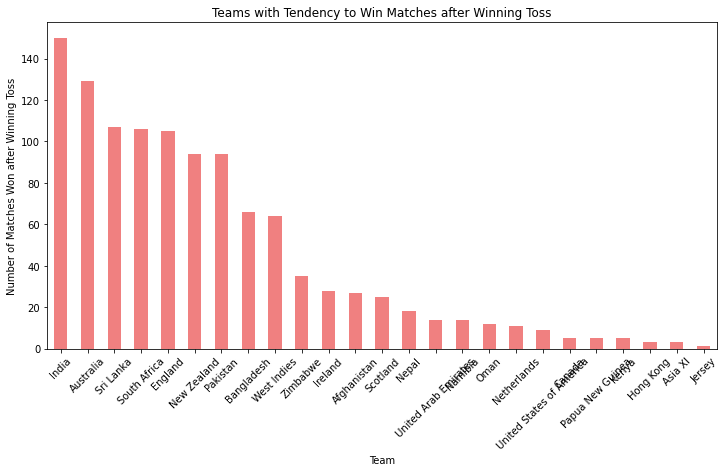

In [67]:
# Identify teams with a tendency to win matches after winning the toss
winning_toss_teams = odi_match_info[odi_match_info['toss_winner'] == odi_match_info['winner']]['toss_winner'].value_counts()
# Plotting teams with a tendency to win matches after winning the toss
plt.figure(figsize=(12, 6))
winning_toss_teams.plot(kind='bar', color='lightcoral')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won after Winning Toss')
plt.title('Teams with Tendency to Win Matches after Winning Toss')
plt.xticks(rotation=45)
plt.show()

In [122]:
data_encoded = pd.get_dummies(data, columns=['toss_decision', 'result'])
correlation_coefficient = data_encoded['toss_decision_bat'].corr(data_encoded['result_normal'])
# Display the correlation coefficient
print("Correlation Coefficient between Toss Decision (Batting) and Match Outcome (Win):", correlation_coefficient)

Correlation Coefficient between Toss Decision (Batting) and Match Outcome (Win): 0.054146883058048045


Match Result Analysis

In [126]:
# Count the number of times each player has been awarded the player of the match for each country
player_of_match_counts_by_country = odi_match_info.groupby(['player_of_match', 'winner']).size().reset_index(name='count')
# Find the player with the most player of the match awards for each country
top_player_of_match_by_country = player_of_match_counts_by_country.loc[player_of_match_counts_by_country.groupby('winner')['count'].idxmax()]
# Sort the results by descending order of the number of awards
top_player_of_match_by_country_sorted = top_player_of_match_by_country.sort_values(by='count', ascending=False)
# Display the results
print("Player with the most player of the match awards for each country (sorted by count in descending order):")
display(top_player_of_match_by_country_sorted)

Player with the most player of the match awards for each country (sorted by count in descending order):


,player_of_match,winner,count
691,V Kohli,India,38
16,AB de Villiers,South Africa,27
336,KC Sangakkara,Sri Lanka,25
636,Shakib Al Hasan,Bangladesh,22
414,MJ Guptill,New Zealand,21
632,Shahid Afridi,Pakistan,19
554,RT Ponting,Australia,17
194,EJG Morgan,England,13
645,Sikandar Raza,Zimbabwe,11
125,CH Gayle,West Indies,11


In [127]:
# Calculate the margin of victory
odi_match_info['margin_of_victory'] = odi_match_info.apply(lambda x: x['win_by_runs'] if x['win_by_runs'] > 0 else x['win_by_wickets'], axis=1)
# Count the number of times the DL method was applied
dl_applied_count = odi_match_info['dl_applied'].sum()
print("Total matches where DL method was applied:", dl_applied_count)

Total matches where DL method was applied: 201


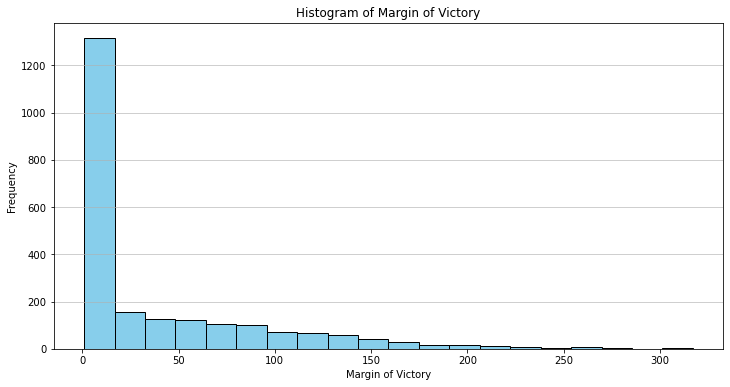

In [74]:
# Filter out matches with non-zero margin of victory
margin_df = odi_match_info[(odi_match_info['win_by_runs'] > 0) | (odi_match_info['win_by_wickets'] > 0)]
# Plotting the chart
plt.figure(figsize=(12, 6))
plt.hist(margin_df['margin_of_victory'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.title('Histogram of Margin of Victory')
plt.grid(axis='y', alpha=0.75)
plt.show()

Head to Head Analysis

In [16]:
def get_past_matches(team1, team2):
    # Filter matches where team1 and team2 were involved
    team_matches = odi_match_info[(odi_match_info['team1'].isin([team1, team2])) & (odi_match_info['team2'].isin([team1, team2]))]
    # Count wins for each team and other results
    team1_wins = team_matches[team_matches['winner'] == team1]
    team2_wins = team_matches[team_matches['winner'] == team2]
    other_results = team_matches[~team_matches['winner'].isin([team1, team2])]
    return team_matches[['team1', 'team2', 'winner', 'venue', 'date']], len(team1_wins), len(team2_wins), len(other_results)
team1 = "India"
team2 = "New Zealand"
past_matches, india_wins, australia_wins, other_results = get_past_matches(team1, team2)
print("Past matches between", team1, "and", team2, ":")
display(past_matches.head())
print("Total Matches:",past_matches.shape[0])
print(team1, "won", india_wins, "times")
print(team2, "won", australia_wins, "times")
print("Other results:", other_results, "times")

Past matches between India and New Zealand :


,team1,team2,winner,venue,date
140,India,New Zealand,India,"Holkar Cricket Stadium, Indore",2023/01/24
143,New Zealand,India,India,Shaheed Veer Narayan Singh International Stadi...,2023/01/21
144,India,New Zealand,India,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2023/01/18
161,India,New Zealand,NaN,"Hagley Oval, Christchurch",2022/11/30
163,India,New Zealand,NaN,"Seddon Park, Hamilton",2022/11/27


Total Matches: 51
India won 25 times
New Zealand won 21 times
Other results: 5 times


In [22]:
def get_seasons_played(country1, country2):
    matches_involving_countries = odi_match_info[(odi_match_info['team1'].isin([country1, country2])) & (odi_match_info['team2'].isin([country1, country2]))]
    seasons_played = matches_involving_countries['season'].unique()
    return seasons_played
def get_stadiums_played(country1, country2, season):
    matches_in_season = odi_match_info[((odi_match_info['team1'].isin([country1, country2])) &(odi_match_info['team2'].isin([country1, country2]))) &(odi_match_info['season'] == season)]
    stadiums_played = matches_in_season['venue'].unique()
    return stadiums_played
def get_match_stats(country1, country2, season, stadium):
    matches_at_stadium = odi_match_info[((odi_match_info['team1'].isin([country1, country2])) &(odi_match_info['team2'].isin([country1, country2]))) &(odi_match_info['season'] == season) &(odi_match_info['venue'] == stadium)]
    for index, match in matches_at_stadium.iterrows():
        match_id = match['id']
        print("Match ID:", match_id)
        print("Date:", match['date'])
        print("Toss Winner:", match['toss_winner'])
        print("Toss Decision:", match['toss_decision'])
        winner = match['winner']
        print("Winner:", winner)
        first_innings = odi_match_data[(odi_match_data['match_id'] == match_id) & (odi_match_data['innings'] == 1)]
        first_innings_score = first_innings['runs_off_bat'].sum() + first_innings['extras'].sum()
        first_innings_wickets_lost = first_innings['wicket_type'].count()
        print("First Innings Score:", first_innings_score)
        print("First Innings Wickets Lost:", first_innings_wickets_lost)
        second_innings = odi_match_data[(odi_match_data['match_id'] == match_id) & (odi_match_data['innings'] == 2)]
        second_innings_score = second_innings['runs_off_bat'].sum() + second_innings['extras'].sum()
        second_innings_wickets_lost = second_innings['wicket_type'].count()
        print("Second Innings Score:", second_innings_score)
        print("Second Innings Wickets Lost:", second_innings_wickets_lost)
        player_of_match = match['player_of_match']
        print("Player of the Match:", player_of_match)
country1 = input("Enter first country: ")
country2 = input("Enter second country: ")
seasons = get_seasons_played(country1, country2)
print("Seasons Played:", seasons)
season = input("Enter season: ")
stadiums = get_stadiums_played(country1, country2, season)
print("Stadiums Played in", season, ":", stadiums)
stadium = input("Enter stadium: ")
print("\n\n")
print("Matches Played at", stadium, "in", season,"\n")
get_match_stats(country1, country2, season, stadium)

Enter first country: India
Enter second country: Australia
Seasons Played: ['2023/24' '2022/23' '2020/21' '2019/20' '2019' '2018/19' '2017/18'
 '2015/16' '2014/15' '2013/14' '2011/12' '2010/11' '2009/10' '2007/08'
 '2006/07' '2004' '2003/04' '2002/03']
Enter season: 2022/23
Stadiums Played in 2022/23 : ['MA Chidambaram Stadium, Chepauk, Chennai'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
 'Wankhede Stadium, Mumbai']
Enter stadium: Wankhede Stadium, Mumbai



Matches Played at Wankhede Stadium, Mumbai in 2022/23 

Match ID: 1348656
Date: 2023/03/17
Toss Winner: India
Toss Decision: field
Winner: India
First Innings Score: 188
First Innings Wickets Lost: 10
Second Innings Score: 191
Second Innings Wickets Lost: 5
Player of the Match: RA Jadeja


In [78]:
#Prediction model that predicts win percenatage of a match based on venue and past meetings
def get_past_matches(team1, team2):
    # Filter matches where team1 and team2 were involved
    team_matches = odi_match_info[((odi_match_info['team1'] == team1) & (odi_match_info['team2'] == team2))|((odi_match_info['team1'] == team2) & (odi_match_info['team2'] == team1))]
    # Get unique venues where matches were played
    venues = team_matches['venue'].unique()
    return venues
def get_team_wins_at_venue(team, venue):
    # Filter matches at the specified venue involving the team
    venue_matches = odi_match_info[((odi_match_info['team1'] == team) | (odi_match_info['team2'] == team)) &(odi_match_info['venue'] == venue)]
    # Count wins for the team
    team_wins = len(venue_matches[venue_matches['winner'] == team])
    return team_wins
def predict_next_match_outcome(team1, team2, venue):
    team1_wins = get_team_wins_at_venue(team1, venue)
    team2_wins = get_team_wins_at_venue(team2, venue)
    total_wins = team1_wins + team2_wins
    if total_wins == 0:
        return 50, 50  # Equal chance of winning
    team1_win_percentage = (team1_wins / total_wins) * 100
    team2_win_percentage = (team2_wins / total_wins) * 100
    return team1_win_percentage, team2_win_percentage
team1 = input("Enter the name of team 1: ")
team2 = input("Enter the name of team 2: ")
venues = get_past_matches(team1, team2)
print("Venues where", team1, "and", team2, "have played against each other:")
i = 1
for venue in venues:
    print(f"{i}. {venue}")
    i += 1
venue_choice = int(input("Enter the number corresponding to the desired venue: ")) - 1
selected_venue = venues[venue_choice]
team1_win_percentage, team2_win_percentage = predict_next_match_outcome(team1, team2, selected_venue)
print("Predicted win percentage for", team1, "at", selected_venue, ":", team1_win_percentage, "%")
print("Predicted win percentage for", team2, "at", selected_venue, ":", team2_win_percentage, "%")

Enter the name of team 1: India
Enter the name of team 2: Pakistan
Venues where India and Pakistan have played against each other:
1. R Premadasa Stadium, Colombo
2. Pallekele International Cricket Stadium
3. Old Trafford
4. Dubai International Cricket Stadium
5. Kennington Oval
6. Edgbaston
7. Adelaide Oval
8. Shere Bangla National Stadium
9. Feroz Shah Kotla
10. Eden Gardens
11. MA Chidambaram Stadium, Chepauk
12. Punjab Cricket Association Stadium, Mohali
13. Rangiri Dambulla International Stadium
14. SuperSport Park
15. National Stadium
16. Sawai Mansingh Stadium
17. Captain Roop Singh Stadium
18. Green Park
19. Nehru Stadium
20. Sheikh Zayed Stadium
21. Multan Cricket Stadium
22. Gaddafi Stadium
23. Rawalpindi Cricket Stadium
24. Arbab Niaz Stadium
25. Arun Jaitley Stadium
26. Sardar Patel (Gujarat) Stadium, Motera
27. Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
28. VRA Cricket Ground
29. SuperSport Park, Centurion
Enter the number corresponding to the desired venue: 3
Pre

Weather and DL Analysis

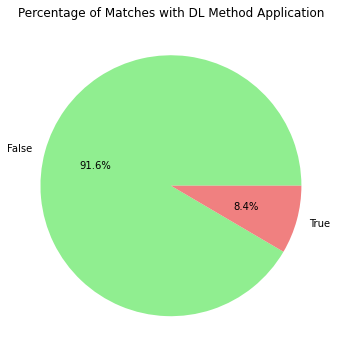

In [79]:
# Analyze matches affected by rain interruptions and their outcomes
# Check if DL method was applied for each match
odi_match_info['dl_method_applied'] = odi_match_info['result'] == 'D/L'
# Calculate the percentage of matches where DL method was applied
dl_method_percentage = odi_match_info['dl_method_applied'].value_counts(normalize=True) * 100
# Plotting the percentage of matches where DL method was applied
plt.figure(figsize=(6, 6))
dl_method_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Percentage of Matches with DL Method Application')
plt.ylabel('')
plt.show()

In [96]:
rain_affected_matches = odi_match_info[odi_match_info['dl_applied'] == 1]
# Regular matches are those where DL method was not applied
regular_matches = odi_match_info[odi_match_info['dl_applied'] == 0]
# Function to calculate performance metrics for each team
def calculate_performance(matches):
    # Group data by team and calculate metrics
    team_performance = matches.groupby('winner').agg({
        'winner': 'count',                   # Total matches won
        'win_by_runs': 'mean',               # Average runs won by
        'win_by_wickets': 'mean'             # Average wickets taken
    }).rename(columns={'winner': 'matches_won'})
    return team_performance
# Calculate performance metrics for rain-affected matches
rain_affected_performance = calculate_performance(rain_affected_matches)
# Calculate performance metrics for regular matches
regular_performance = calculate_performance(regular_matches)
# Merge the performance metrics for rain-affected and regular matches
performance_comparison = pd.merge(rain_affected_performance, regular_performance, 
                                  left_index=True, right_index=True, 
                                  suffixes=('_rain_affected', '_regular'), how='outer')
# Fill NaN values with 0 (if a team has not won any matches in a particular category)
performance_comparison.fillna(0, inplace=True)
# Display the performance comparison
print("Performance Comparison:")
display(performance_comparison)
# Determine if certain teams have a better record in rain-affected matches compared to others
better_in_rain = performance_comparison['matches_won_rain_affected'] > 10
teams_better_in_rain = performance_comparison[better_in_rain].index.tolist()
print("\nTeams with a good record in rain-affected matches:")
print(teams_better_in_rain)

Performance Comparison:


,matches_won_rain_affected,win_by_runs_rain_affected,win_by_wickets_rain_affected,matches_won_regular,win_by_runs_regular,win_by_wickets_regular
winner,,,,,,
Afghanistan,5.0,43.000000,0.000000,51,42.549020,2.333333
Africa XI,0.0,0.000000,0.000000,1,2.000000,0.000000
Asia XI,0.0,0.000000,0.000000,3,26.000000,0.000000
Australia,16.0,46.062500,1.250000,259,40.440154,2.652510
Bangladesh,11.0,25.272727,3.727273,117,31.504274,3.059829
Bermuda,1.0,11.000000,0.000000,1,0.000000,6.000000
Canada,1.0,4.000000,0.000000,9,42.222222,2.444444
England,27.0,23.925926,2.629630,182,33.082418,3.082418
Hong Kong,2.0,15.000000,3.500000,4,54.500000,1.750000



Teams with a good record in rain-affected matches:
['Australia', 'Bangladesh', 'England', 'India', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']


Fielding Analysis

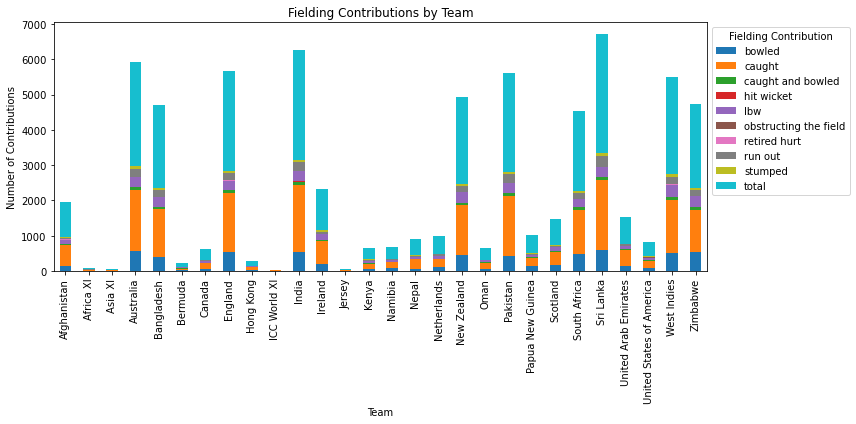

Players with exceptional fielding skills:


wicket_type                    bowled  caught  caught and bowled  hit wicket  \
batting_team player_dismissed                                                  
Sri Lanka    KC Sangakkara         29     174                 12           1   
             DPMD Jayawardene      30     147                  8           0   
             TM Dilshan            54     135                  7           0   
India        V Kohli               32     155                  6           1   
Bangladesh   Tamim Iqbal           32     134                  1           0   
India        RG Sharma             36     128                  5           0   
             MS Dhoni              37     126                  4           0   
West Indies  CH Gayle              32     123                  3           0   
Pakistan     Mohammad Hafeez       22     131                  3           1   
Sri Lanka    WU Tharanga           40     123                  3           0   
Bangladesh   Mushfiqur Rahim       24     125                  3           0   
             Shakib Al Hasan       37      99                  8           0   
New Zealand  MJ Guptill            23     120                  3           1   
Pakistan     Shoaib Malik          18     114                  4           1   
New Zealand  LRPL Taylor           20     101                  5           0   
England      EJG Morgan            15     127                  9           0   
India        Yuvraj Singh          33     106                  9           0   
Australia    RT Ponting            15     106                  9           0   
South Africa AB de Villiers        23     107                  4           0   
Zimbabwe     H Masakadza           33      91                  5           0   

wicket_type                    lbw  obstructing the field  retired hurt  \
batting_team player_dismissed                                             
Sri Lanka    KC Sangakkara      14                      0             0   
             DPMD Jayawardene   26                      0             0   
             TM Dilshan         10                      0             0   
India        V Kohli            16                      0             0   
Bangladesh   Tamim Iqbal        20                      0             0   
India        RG Sharma          21                      0             1   
             MS Dhoni           17                      0             0   
West Indies  CH Gayle           22                      0             1   
Pakistan     Mohammad Hafeez    19                      1             0   
Sri Lanka    WU Tharanga         8                      0             0   
Bangladesh   Mushfiqur Rahim    18                      0             1   
             Shakib Al Hasan    18                      0             1   
New Zealand  MJ Guptill         19                      0             1   
Pakistan     Shoaib Malik       14                      0             2   
New Zealand  LRPL Taylor        30                      0             0   
England      EJG Morgan         12                      0             1   
India        Yuvraj Singh       17                      0             0   
Australia    RT Ponting         23                      0             0   
South Africa AB de Villiers     14                      0             0   
Zimbabwe     H Masakadza        20                      0             0   

wicket_type                    run out  stumped  total  
batting_team player_dismissed                           
Sri Lanka    KC Sangakkara          14        6    250  
             DPMD Jayawardene       20        8    239  
             TM Dilshan             21        3    230  
India        V Kohli                12        5    227  
Bangladesh   Tamim Iqbal            18        7    212  
India        RG Sharma              13        3    207  
             MS Dhoni               14        2    200  
West Indies  CH Gayle                8        1    190  
Pakistan     Moham

In [98]:
# Filter out rows where a player is involved in a fielding event
fielding_odi_match_data = odi_match_data[(odi_match_data['wicket_type'].isin(['caught', 'run out'])) | (~odi_match_data['player_dismissed'].isnull())]
# Count catches, run-outs, and other fielding contributions for each player
fielding_stats = fielding_odi_match_data.groupby(['batting_team', 'player_dismissed', 'wicket_type']).size().unstack(fill_value=0)
# Calculate total fielding contributions for each player
fielding_stats['total'] = fielding_stats.sum(axis=1)
# Calculate total fielding contributions for each team
team_fielding_stats = fielding_stats.groupby('batting_team').sum()
# Plot fielding contributions for each team
team_fielding_stats.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Fielding Contributions by Team')
plt.xlabel('Team')
plt.ylabel('Number of Contributions')
plt.legend(title='Fielding Contribution', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
# Identify players with exceptional fielding skills
top_fielders = fielding_stats.sort_values('total', ascending=False).head(20)
print("Players with exceptional fielding skills:")
display(top_fielders)